# Current Employment Statistics EDA

This Notebook provides a reproducible analysis of the data collected from Current Employment Statistics on the U.S. Bureau of Labor Statistics website, sourced by the running the python scripts contained in \bls_ces\raw. The Comma Separated Values files are contained in \bls_ces\out.

In [1]:
import sys, asyncio

if sys.platform.startswith("win"):
    asyncio.set_event_loop_policy(asyncio.WindowsProactorEventLoopPolicy())

from pathlib import Path
from __future__ import annotations
import pandas as pd
import playwright


def find_project_root(markers=("bls_ces", ".git", "pyproject.toml")):
    """
    Walk upward from the current directory until we find a project marker.
    """
    path = Path.cwd().resolve()

    for parent in [path] + list(path.parents):
        for marker in markers:
            if (parent / marker).exists():
                return parent

    raise RuntimeError("Project root not found. Are you inside the project?")

PROJECT_ROOT = find_project_root()
DATA_DIR = PROJECT_ROOT / "bls_ces" / "out"

print("Project root:", PROJECT_ROOT)
print("Data dir exists:", DATA_DIR.exists())
print("CSV files:", [p.name for p in DATA_DIR.glob("*.csv")])

Project root: C:\Users\whoop\PycharmProjects\PythonProject2
Data dir exists: True
CSV files: ['graphic_designer_monthly_ces.csv', 'graphic_designer_proxy_monthly.csv', 'mechanic_monthly_ces.csv', 'mechanic_proxy_monthly.csv', 'software_developer_monthly_ces.csv', 'software_developer_proxy_monthly.csv']


  Cloning https://github.com/benji-carr/Serease-Time-Series-Analyzer-.git to c:\users\whoop\appdata\local\temp\pip-req-build-71v_3qe6
  Resolved https://github.com/benji-carr/Serease-Time-Series-Analyzer-.git to commit ae1b9b396bd8c1bf4594cc4b5e8b3fbf0b44c011
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/benji-carr/Serease-Time-Series-Analyzer-.git 'C:\Users\whoop\AppData\Local\Temp\pip-req-build-71v_3qe6'



=== Processing mechanic_monthly_ces.csv ===
Target column : avg_hourly_earnings
Frequency     : MS
Observations  : 431


C:\Users\whoop\PycharmProjects\PythonProject2\.venv\Lib\site-packages\Serease\pre_processing\schema_detector.py:210: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  parsed = pd.to_datetime(


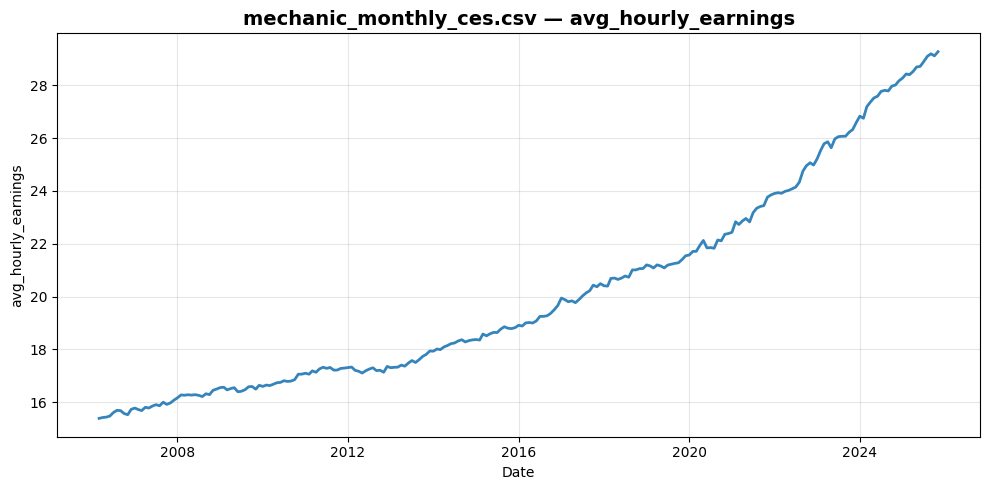


=== Processing graphic_designer_monthly_ces.csv ===
Target column : avg_hourly_earnings
Frequency     : MS
Observations  : 431


C:\Users\whoop\PycharmProjects\PythonProject2\.venv\Lib\site-packages\Serease\pre_processing\schema_detector.py:210: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  parsed = pd.to_datetime(


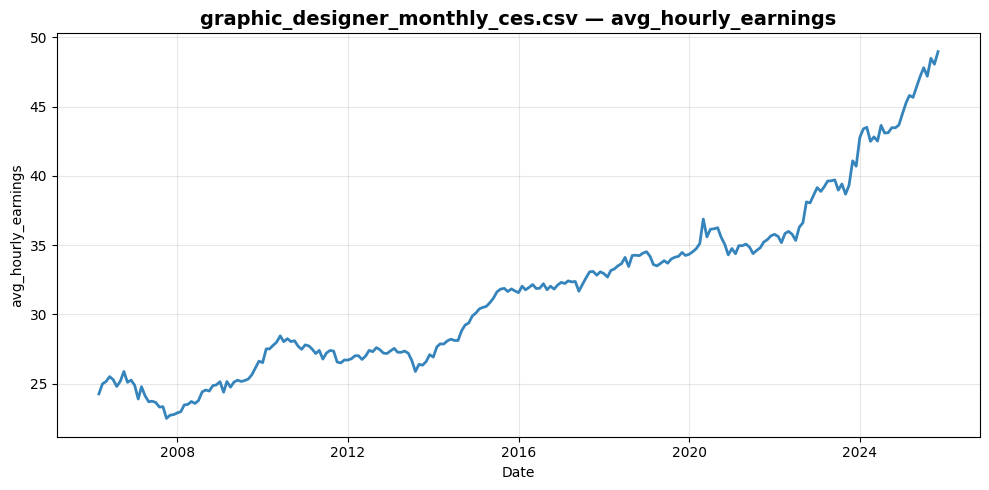


=== Processing software_developer_monthly_ces.csv ===
Target column : avg_hourly_earnings
Frequency     : MS
Observations  : 432


C:\Users\whoop\PycharmProjects\PythonProject2\.venv\Lib\site-packages\Serease\pre_processing\schema_detector.py:210: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  parsed = pd.to_datetime(


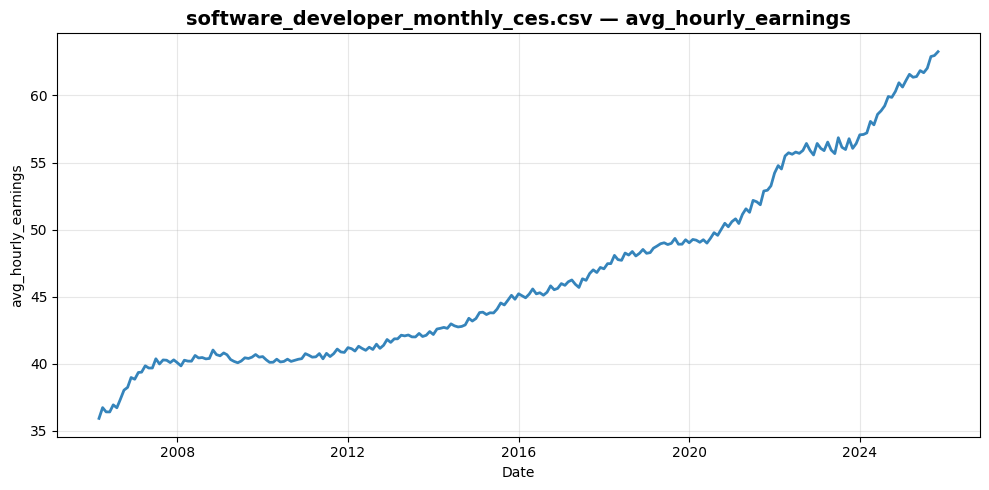

In [2]:
%pip install git+https://github.com/benji-carr/Serease-Time-Series-Analyzer-.git
from Serease.pre_processing import (
    DataIngestor,
    SchemaDetector,
    TimeSeriesCleaner,
)

import matplotlib.pyplot as plt
from pathlib import Path

CSV_LIST = [
    "mechanic_monthly_ces.csv",
    "graphic_designer_monthly_ces.csv",
    "software_developer_monthly_ces.csv",
]

results = {}

for entry in CSV_LIST:
    CSV_PATH = DATA_DIR / entry
    if not CSV_PATH.exists():
        print(f"[SKIP] Missing file: {CSV_PATH}")
        continue

    print(f"\n=== Processing {entry} ===")

    # --- ingest ---
    ingestor = DataIngestor(str(CSV_PATH))
    df = ingestor.load()
    ing_meta = ingestor.get_metadata()

    # --- schema detect ---
    schema_detector = SchemaDetector(
        df=df,
        ingestion_meta=ing_meta,
        user_target_col=None,
    )
    schema_meta = schema_detector.detect()

    # --- clean ---
    cleaner = TimeSeriesCleaner(df=df, schema=schema_meta)
    cleaned_df, ts_meta = cleaner.clean()

    # --- store results ---
    results[entry] = {
        "csv_path": str(CSV_PATH),
        "df_raw": df,
        "ingestion_meta": ing_meta,
        "schema_meta": schema_meta,
        "cleaned_df": cleaned_df,
        "ts_meta": ts_meta,
    }

    # --- quick summary ---
    print("Target column :", schema_meta.target_col)
    print("Frequency     :", ts_meta.freq)
    print("Observations  :", ts_meta.n_obs)

    # --- plot ---
    y = cleaned_df[schema_meta.target_col]
    plt.figure(figsize=(10, 5))
    plt.plot(cleaned_df.index, y.values, linewidth=2.0, alpha=0.9)
    plt.title(f"{entry} — {schema_meta.target_col}", fontsize=14, weight="bold")
    plt.xlabel("Date")
    plt.ylabel(schema_meta.target_col)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()



In [3]:
cleaned_dfs = {
    name: payload["cleaned_df"]
    for name, payload in results.items()
}
print("Mechanic Data:")
display(cleaned_dfs["mechanic_monthly_ces.csv"].head())
print("Software Developer Data:")
display(cleaned_dfs["software_developer_monthly_ces.csv"].head())
print("Graphic Designer Data:")
display(cleaned_dfs["graphic_designer_monthly_ces.csv"].head())


Mechanic Data:


,employment_thousands,avg_hourly_earnings
date,,
1990-01-01,3970.1,NaN
1990-02-01,3956.8,NaN
1990-03-01,3988.1,NaN
1990-04-01,3978.8,NaN
1990-05-01,3982.8,NaN


Software Developer Data:


,employment_thousands,avg_hourly_earnings
date,,
1990-01-01,1637.6,NaN
1990-02-01,1644.0,NaN
1990-03-01,1648.2,NaN
1990-04-01,1650.5,NaN
1990-05-01,1651.4,NaN


Graphic Designer Data:


,employment_thousands,avg_hourly_earnings
date,,
1990-01-01,97.8,NaN
1990-02-01,97.8,NaN
1990-03-01,98.1,NaN
1990-04-01,97.2,NaN
1990-05-01,96.7,NaN


In [4]:
# Adding features for charts
CAREERS = {
    "Mechanic": cleaned_dfs["mechanic_monthly_ces.csv"].copy(),
    "Software Developer": cleaned_dfs["software_developer_monthly_ces.csv"].copy(),
    "Graphic Designer": cleaned_dfs["graphic_designer_monthly_ces.csv"].copy(),
}

def add_features(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    # Indexed series (base = first valid observation)
    df["emp_index"] = df["employment_thousands"] / df["employment_thousands"].iloc[0] * 100

    first_wage = df["avg_hourly_earnings"].dropna().iloc[0] if df["avg_hourly_earnings"].notna().any() else None
    df["wage_index"] = (df["avg_hourly_earnings"] / first_wage * 100) if first_wage else pd.NA

    # YoY % changes (12-month lag, monthly data)
    df["emp_yoy_pct"] = df["employment_thousands"].pct_change(12) * 100
    df["wage_yoy_pct"] = df["avg_hourly_earnings"].pct_change(12) * 100

    # MoM % changes
    df["emp_mom_pct"] = df["employment_thousands"].pct_change(1) * 100
    df["wage_mom_pct"] = df["avg_hourly_earnings"].pct_change(1) * 100

    # Log transforms
    df["log_emp"] = (df["employment_thousands"]).apply(lambda x: None if pd.isna(x) or x <= 0 else float(pd.Series([x]).apply(pd.np.log).iloc[0]))
    # safer without numpy? let's do numpy explicitly
    return df

import numpy as np
def add_features(df):
    df = df.copy()
    df["emp_index"] = df["employment_thousands"] / df["employment_thousands"].iloc[0] * 100

    if df["avg_hourly_earnings"].notna().any():
        base_wage = df.loc[df["avg_hourly_earnings"].notna(), "avg_hourly_earnings"].iloc[0]
        df["wage_index"] = df["avg_hourly_earnings"] / base_wage * 100
    else:
        df["wage_index"] = np.nan

    df["emp_yoy_pct"] = df["employment_thousands"].pct_change(12) * 100
    df["wage_yoy_pct"] = df["avg_hourly_earnings"].pct_change(12) * 100
    df["emp_mom_pct"] = df["employment_thousands"].pct_change(1) * 100
    df["wage_mom_pct"] = df["avg_hourly_earnings"].pct_change(1) * 100

    df["log_emp"] = np.log(df["employment_thousands"])
    df["log_wage"] = np.log(df["avg_hourly_earnings"])

    # rolling stats
    for w in [6, 12]:
        df[f"emp_ma_{w}"] = df["employment_thousands"].rolling(w).mean()
        df[f"wage_ma_{w}"] = df["avg_hourly_earnings"].rolling(w).mean()
        df[f"emp_roll_std_{w}"] = df["emp_mom_pct"].rolling(w).std()
        df[f"wage_roll_std_{w}"] = df["wage_mom_pct"].rolling(w).std()

    return df

CAREERS = {k: add_features(v) for k, v in CAREERS.items()}


In [5]:
def plot_one(df, y, title, ylabel=None):
    plt.figure(figsize=(11, 4.5))
    plt.plot(df.index, df[y])
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel(ylabel if ylabel else y)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

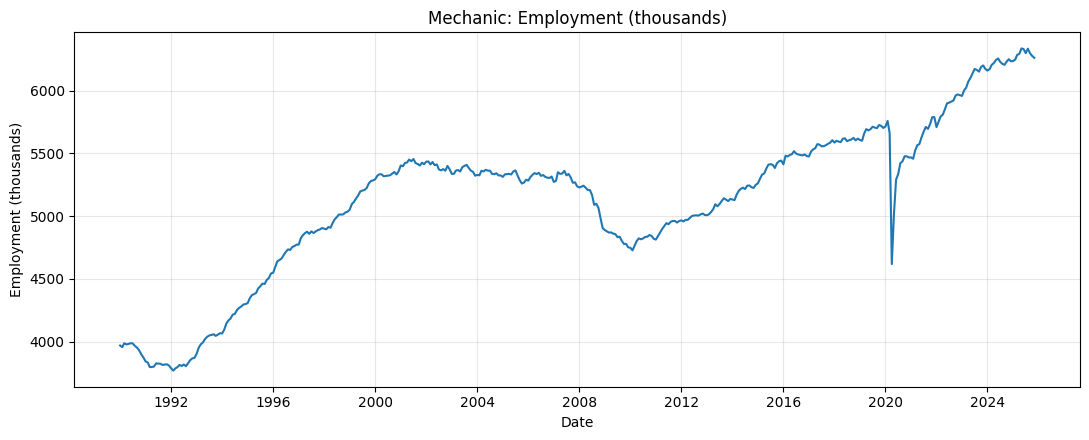

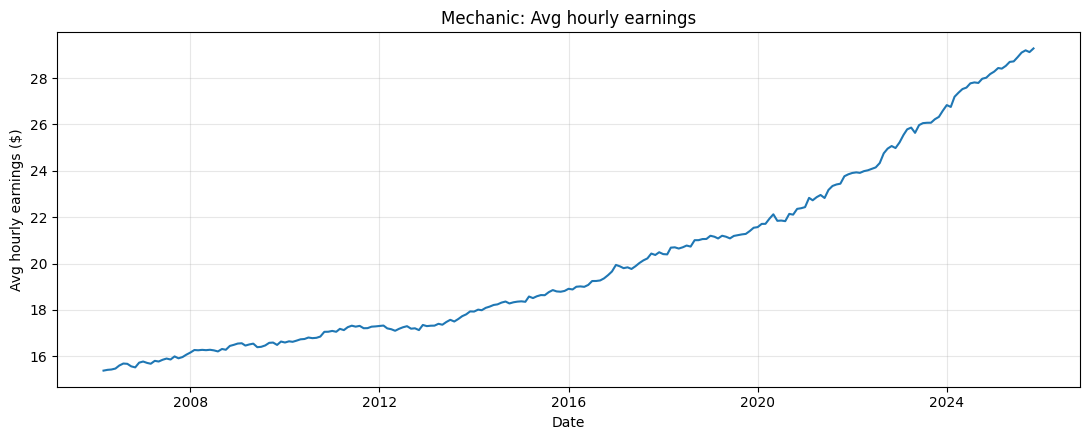

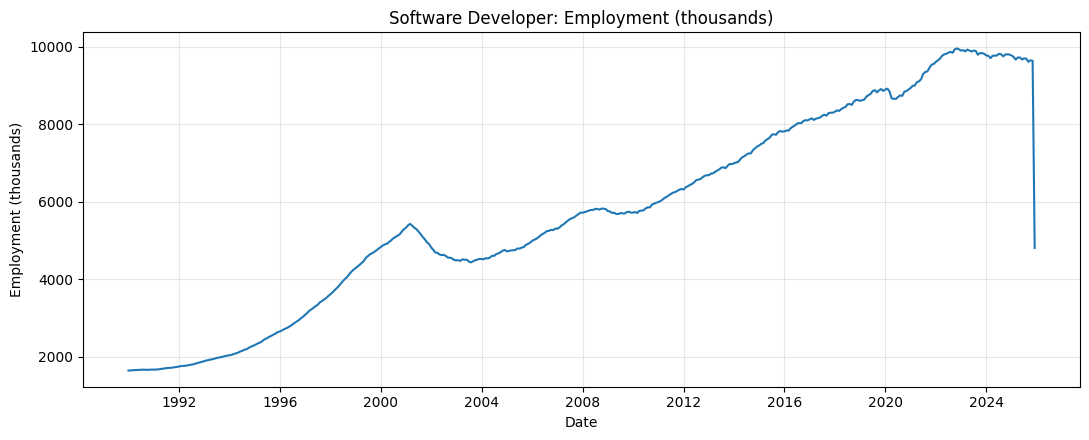

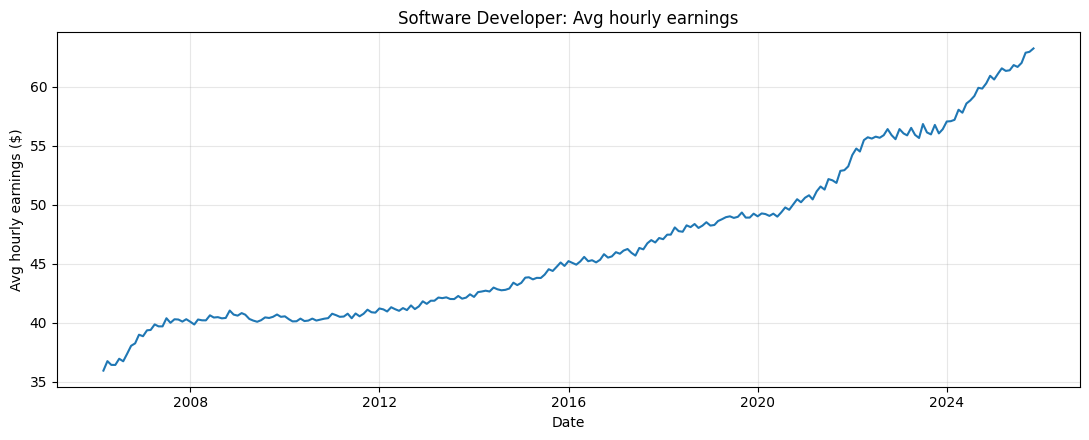

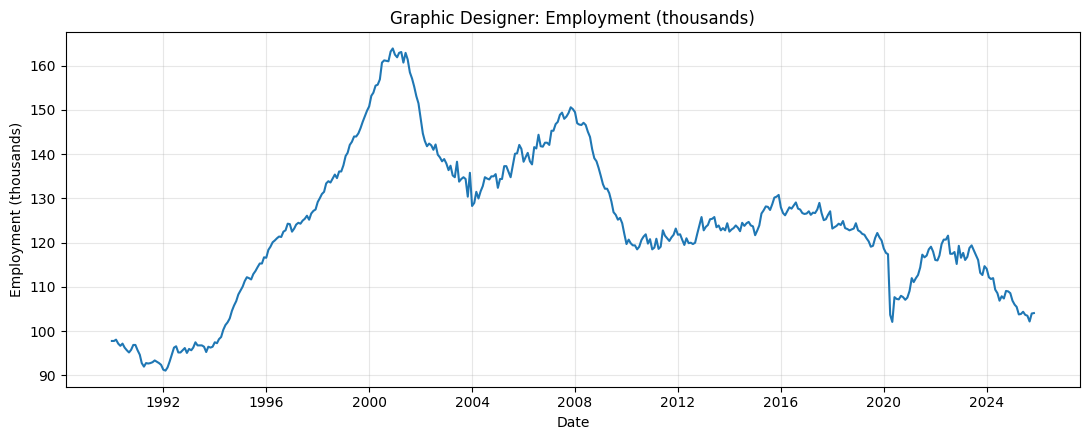

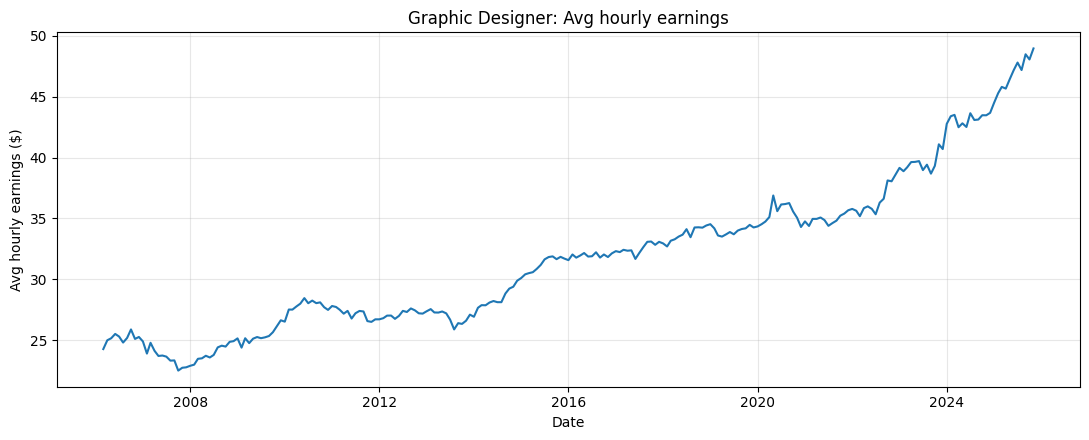

In [6]:
for name, df in CAREERS.items():
    plot_one(df, "employment_thousands", f"{name}: Employment (thousands)", "Employment (thousands)")
    plot_one(df, "avg_hourly_earnings", f"{name}: Avg hourly earnings", "Avg hourly earnings ($)")

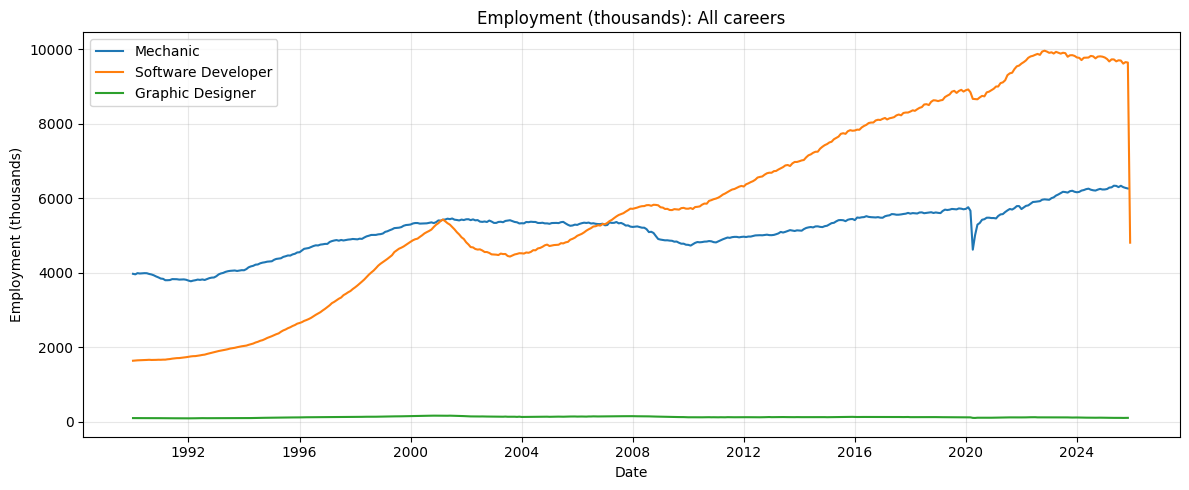

In [7]:
plt.figure(figsize=(12,5))
for name, df in CAREERS.items():
    plt.plot(df.index, df["employment_thousands"], label=name)
plt.title("Employment (thousands): All careers")
plt.xlabel("Date")
plt.ylabel("Employment (thousands)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


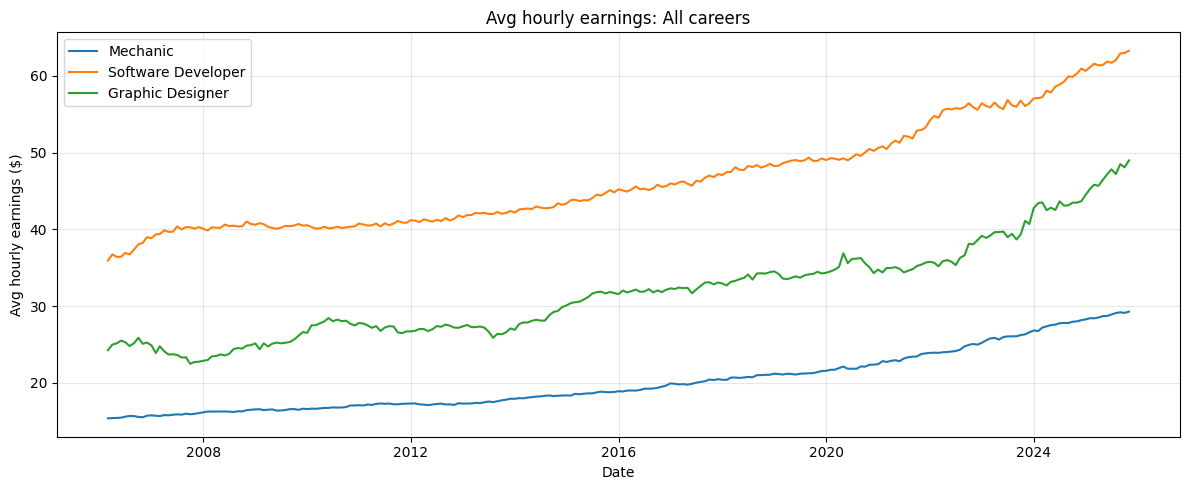

In [8]:
plt.figure(figsize=(12,5))
for name, df in CAREERS.items():
    plt.plot(df.index, df["avg_hourly_earnings"], label=name)
plt.title("Avg hourly earnings: All careers")
plt.xlabel("Date")
plt.ylabel("Avg hourly earnings ($)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


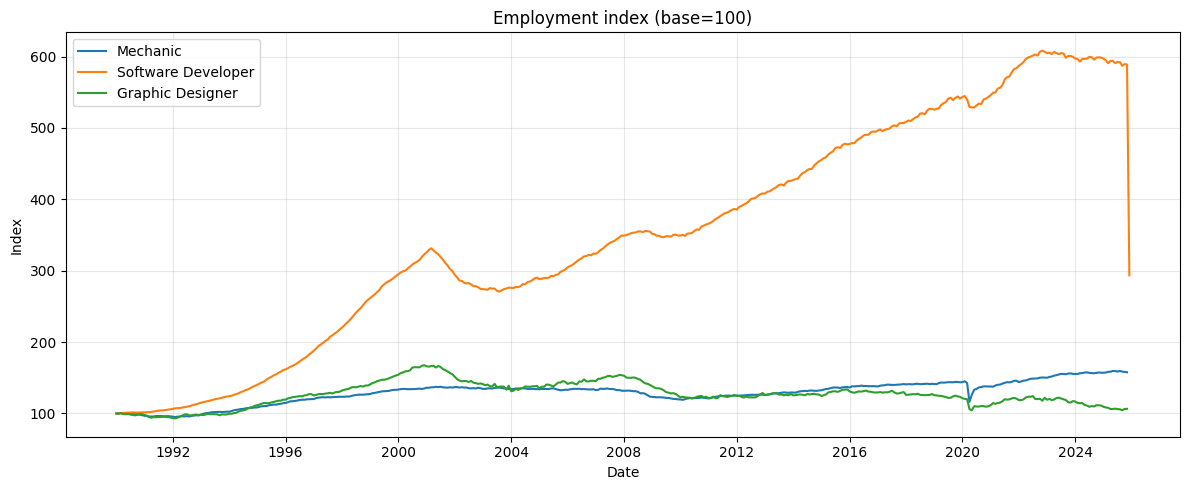

In [9]:
plt.figure(figsize=(12,5))
for name, df in CAREERS.items():
    plt.plot(df.index, df["emp_index"], label=name)
plt.title("Employment index (base=100)")
plt.xlabel("Date")
plt.ylabel("Index")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

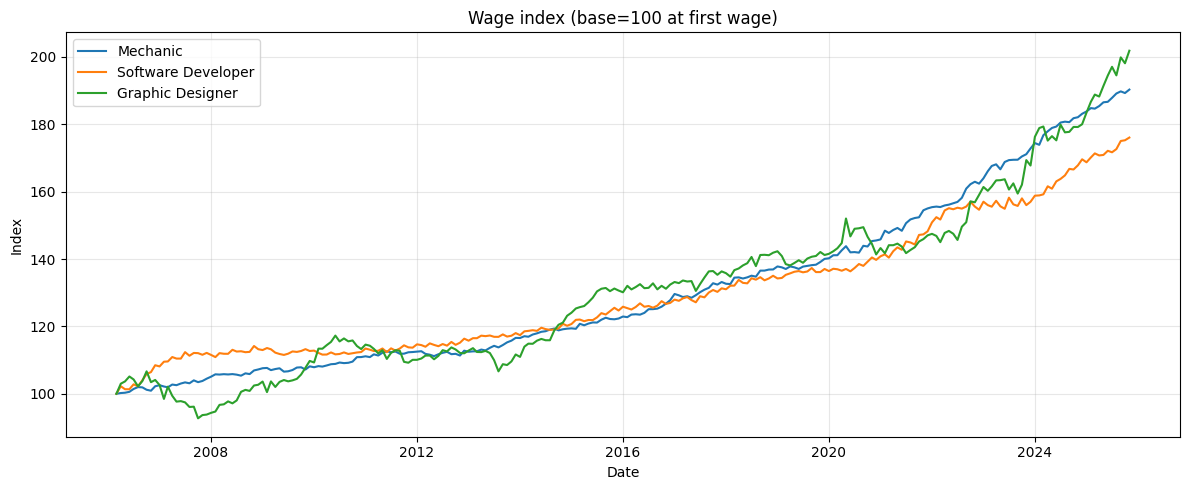

In [10]:
plt.figure(figsize=(12,5))
for name, df in CAREERS.items():
    plt.plot(df.index, df["wage_index"], label=name)
plt.title("Wage index (base=100 at first wage)")
plt.xlabel("Date")
plt.ylabel("Index")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


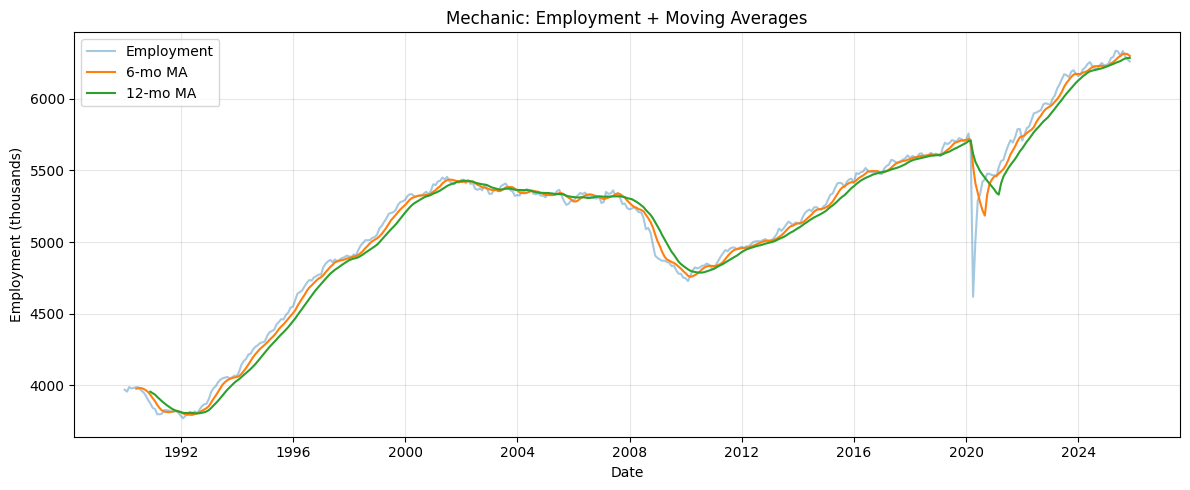

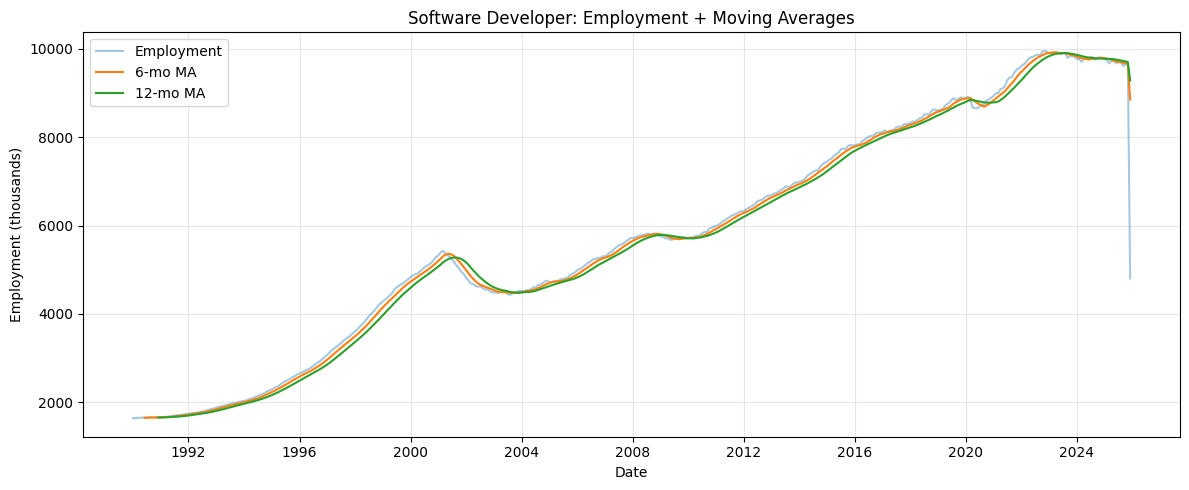

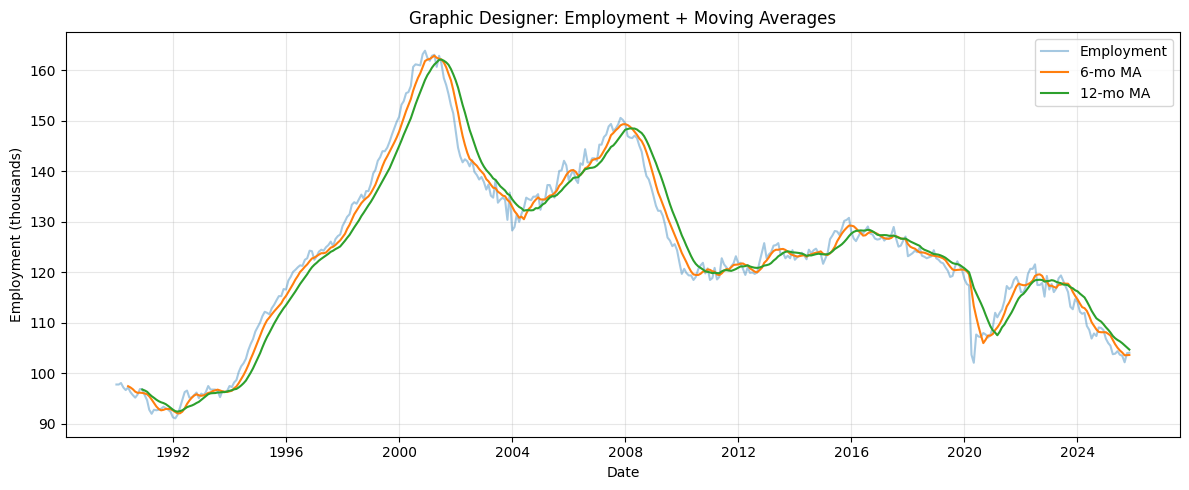

In [11]:
for name, df in CAREERS.items():
    plt.figure(figsize=(12,5))
    plt.plot(df.index, df["employment_thousands"], label="Employment", alpha=0.4)
    plt.plot(df.index, df["emp_ma_6"], label="6-mo MA")
    plt.plot(df.index, df["emp_ma_12"], label="12-mo MA")
    plt.title(f"{name}: Employment + Moving Averages")
    plt.xlabel("Date")
    plt.ylabel("Employment (thousands)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


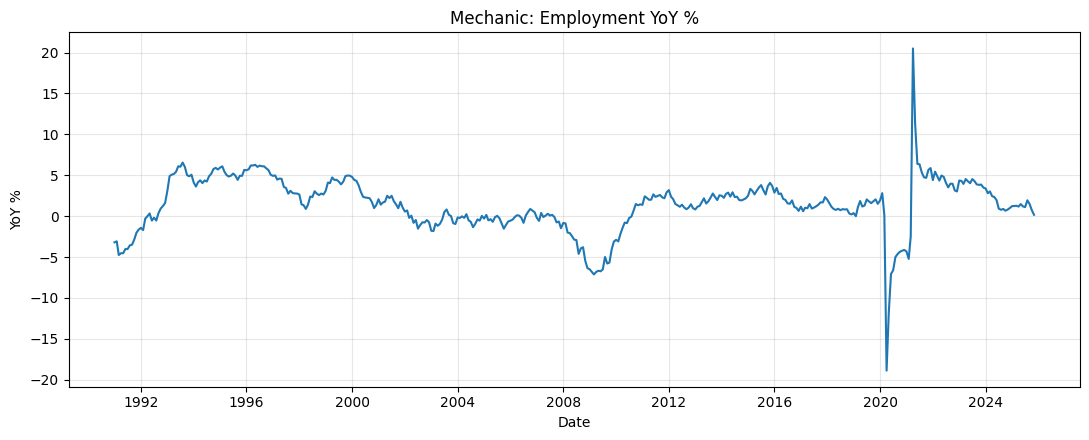

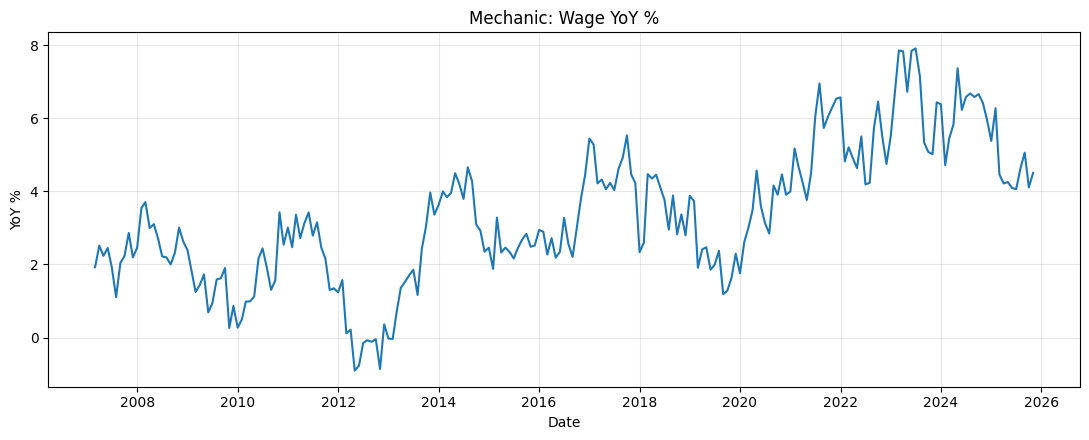

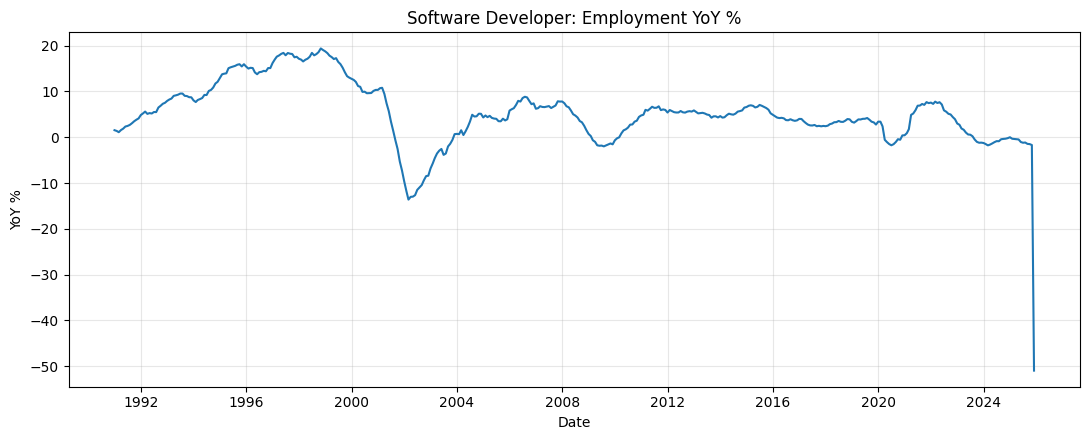

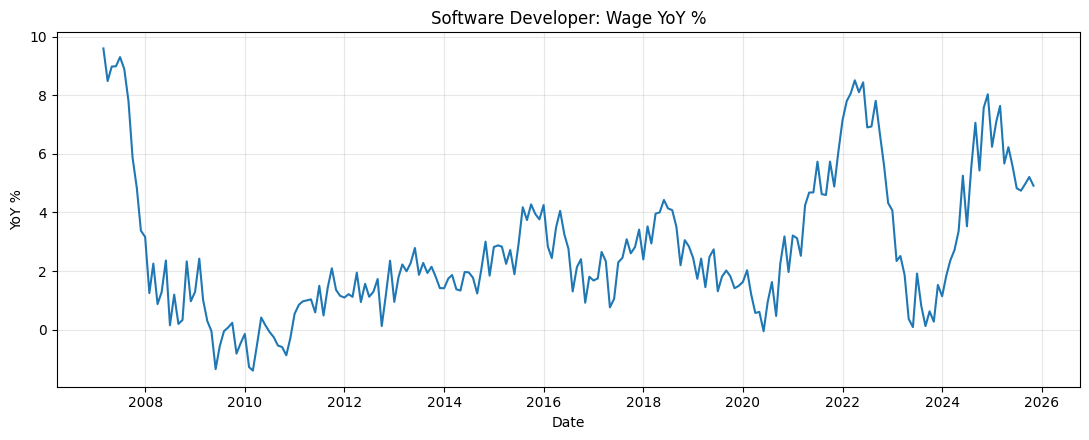

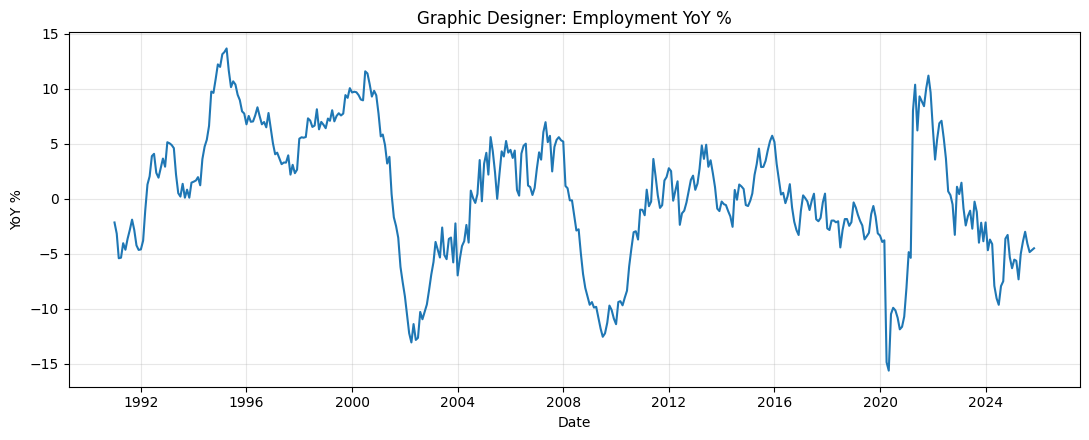

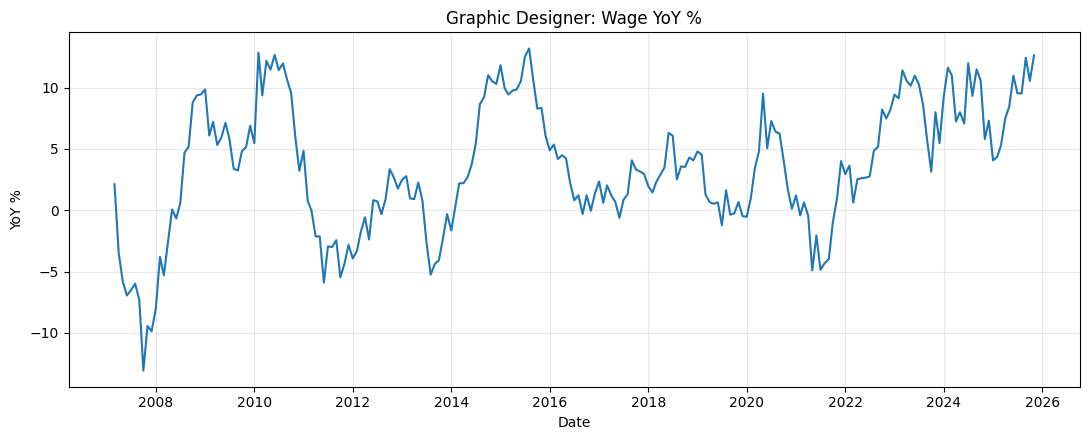

In [12]:
for name, df in CAREERS.items():
    plot_one(df, "emp_yoy_pct", f"{name}: Employment YoY %", "YoY %")
    plot_one(df, "wage_yoy_pct", f"{name}: Wage YoY %", "YoY %")


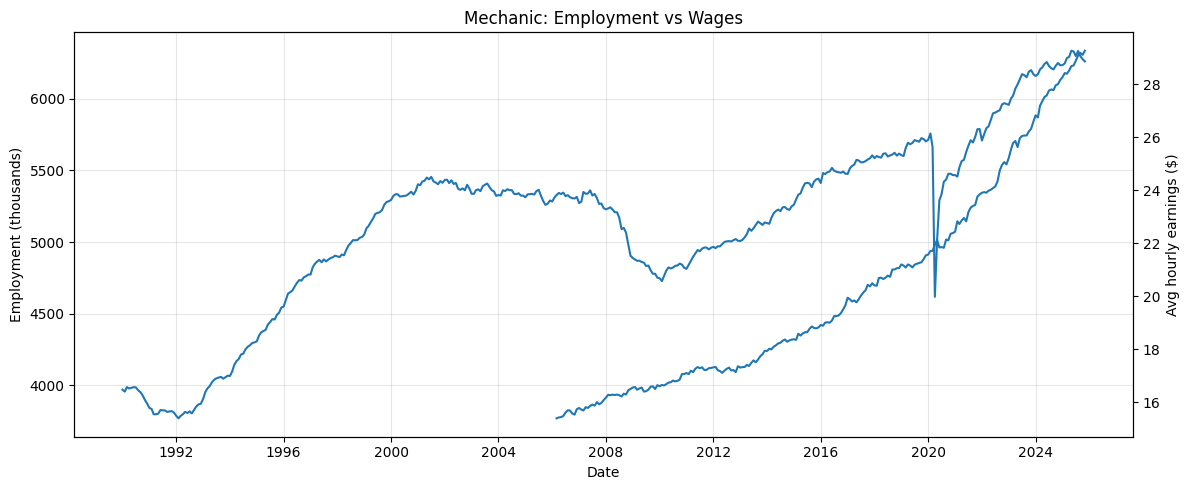

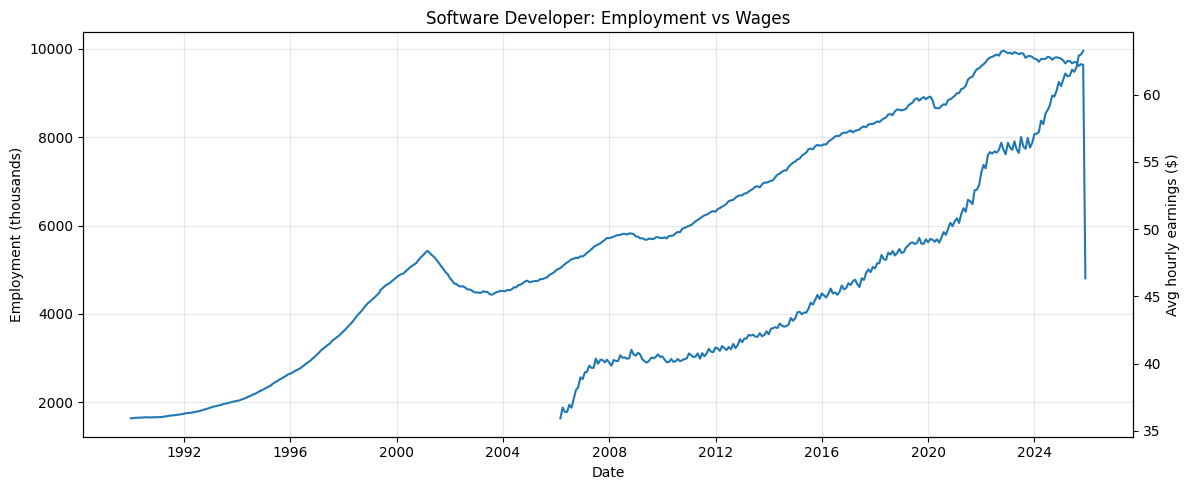

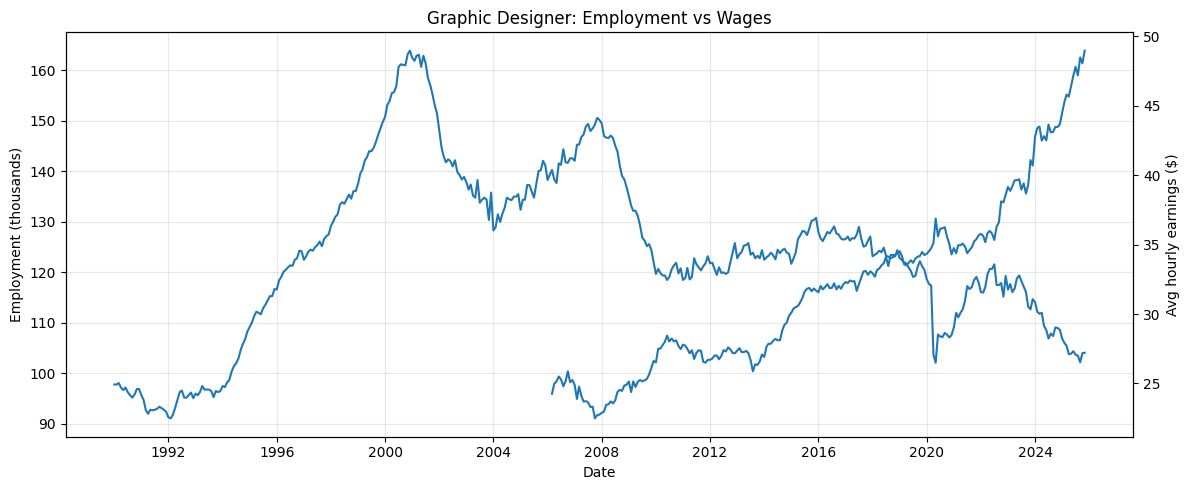

In [13]:
for name, df in CAREERS.items():
    fig, ax1 = plt.subplots(figsize=(12,5))

    ax1.plot(df.index, df["employment_thousands"])
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Employment (thousands)")
    ax1.grid(True, alpha=0.3)

    ax2 = ax1.twinx()
    ax2.plot(df.index, df["avg_hourly_earnings"])
    ax2.set_ylabel("Avg hourly earnings ($)")

    plt.title(f"{name}: Employment vs Wages")
    plt.tight_layout()
    plt.show()

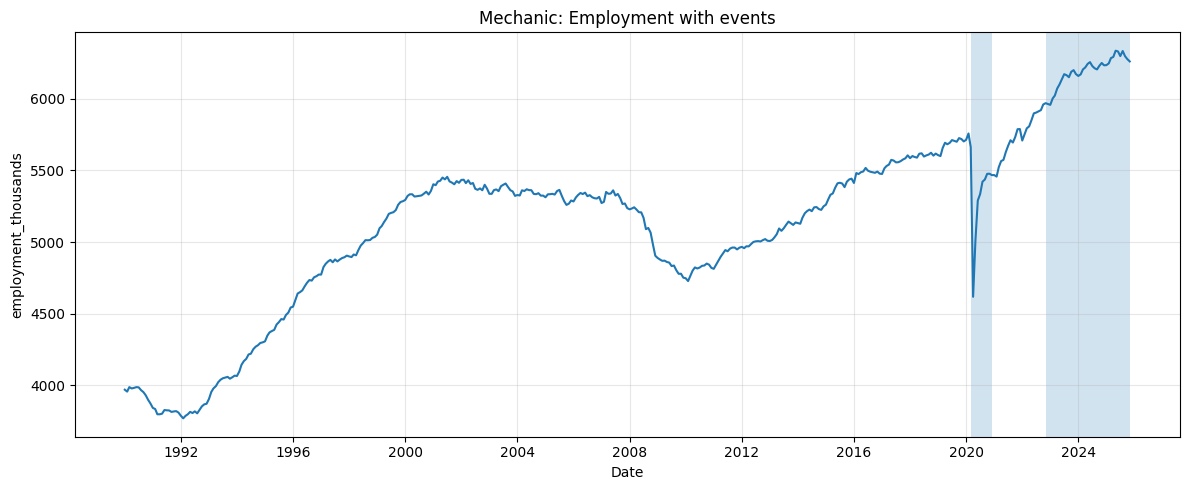

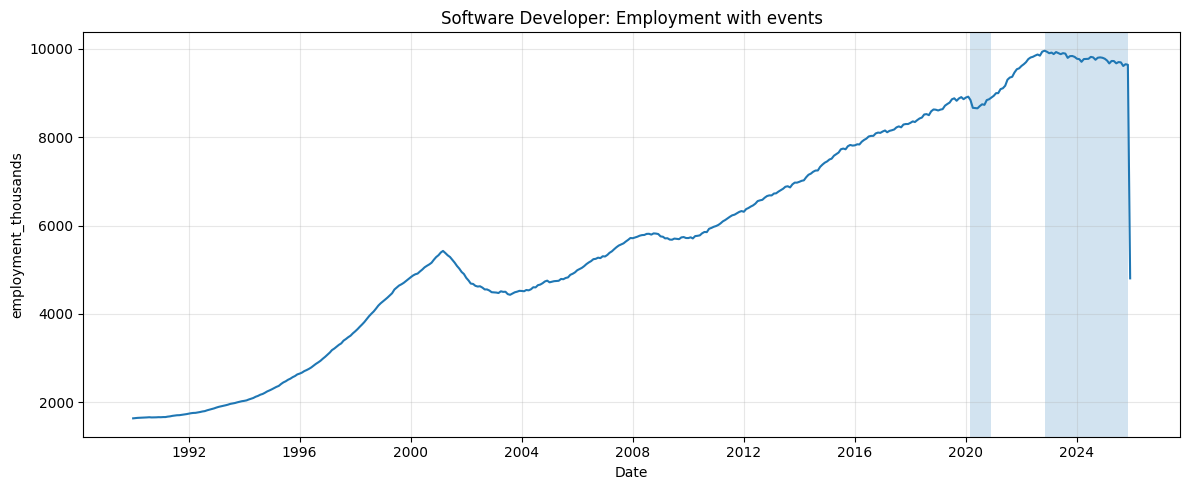

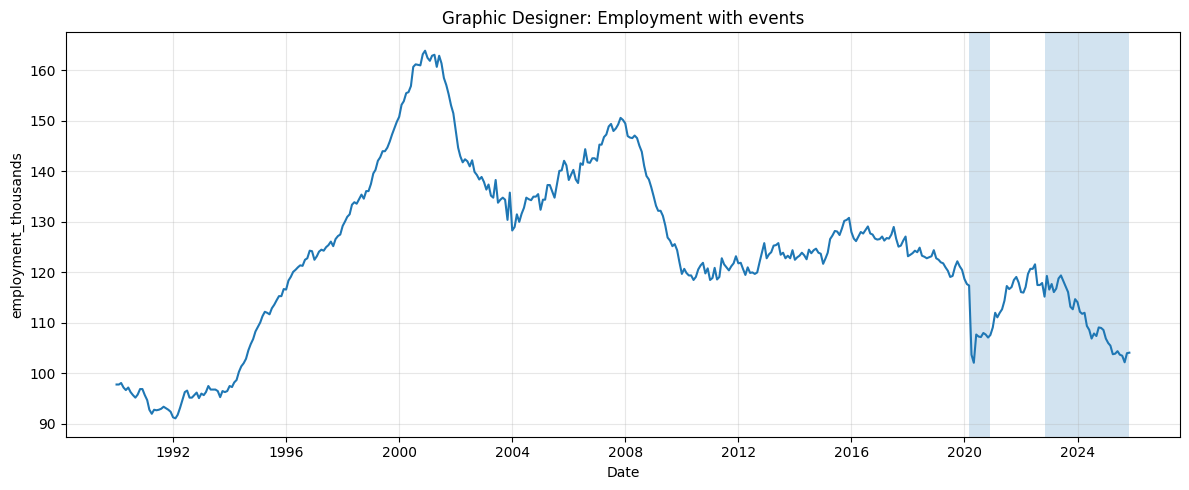

In [14]:
EVENTS = [
    ("COVID", "2020-03-01", "2020-12-01"),
    ("AI era", "2022-11-01", df.index.max()),
]

def plot_with_events(df, y, title):
    plt.figure(figsize=(12,5))
    plt.plot(df.index, df[y])
    for label, start, end in EVENTS:
        plt.axvspan(pd.to_datetime(start), pd.to_datetime(end), alpha=0.2)
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel(y)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

for name, df in CAREERS.items():
    plot_with_events(df, "employment_thousands", f"{name}: Employment with events")


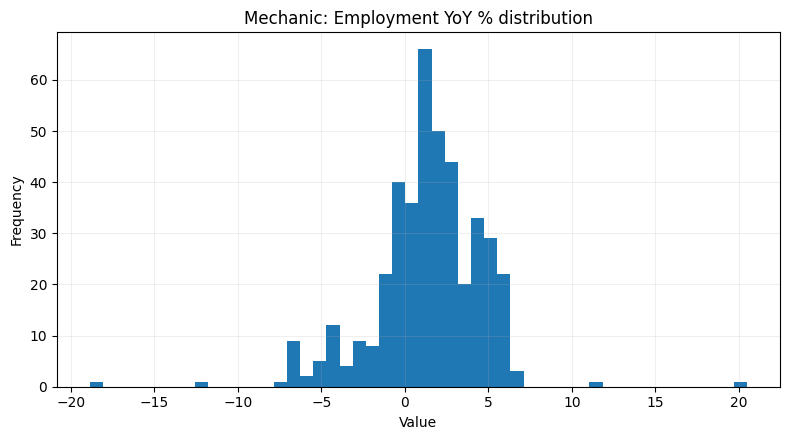

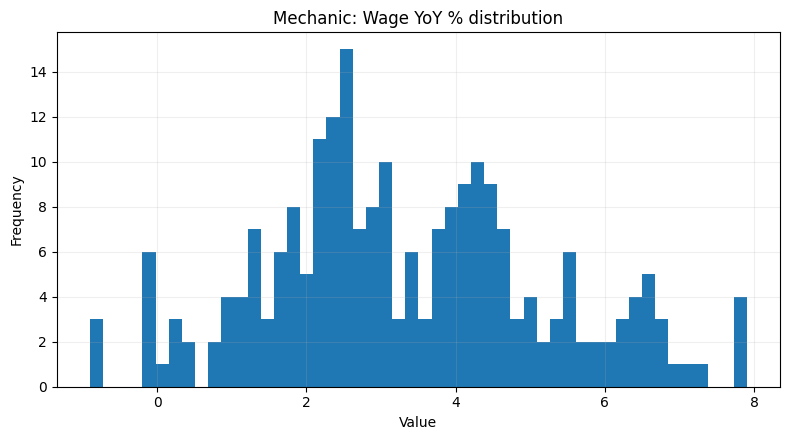

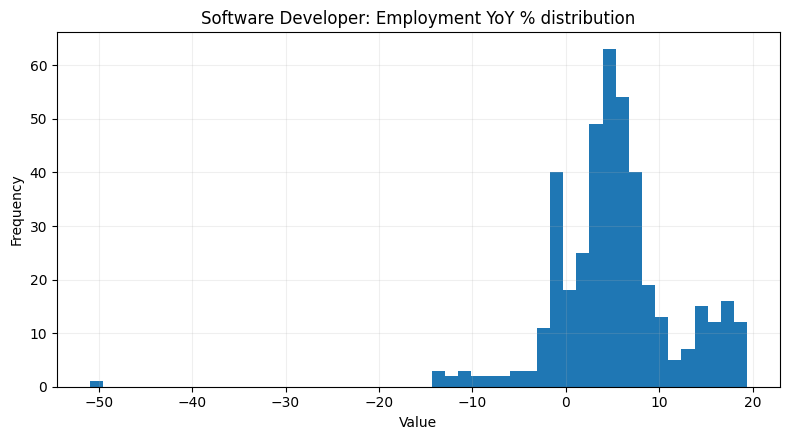

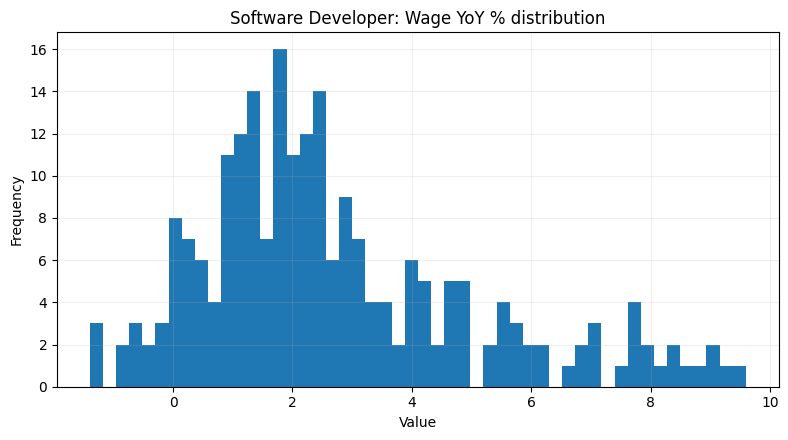

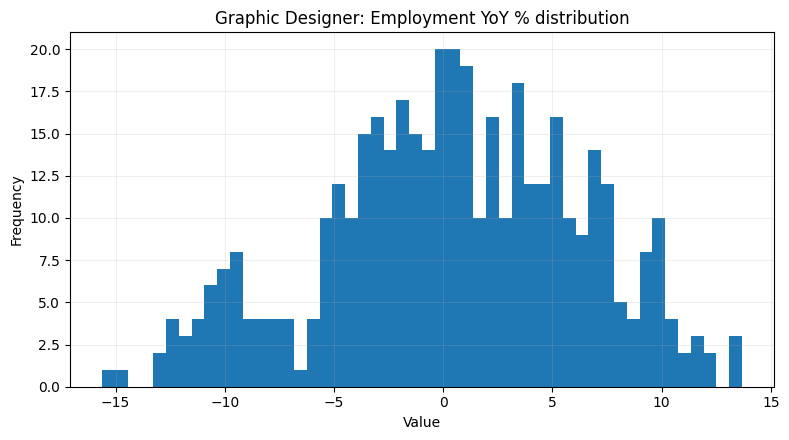

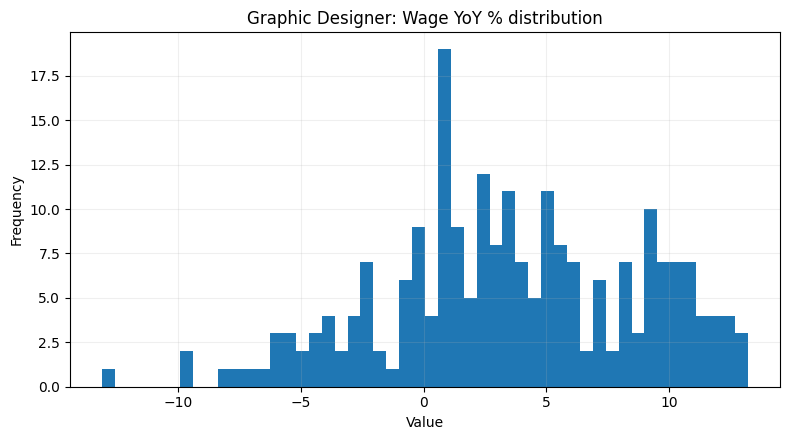

In [15]:
def hist(series, title, bins=50):
    plt.figure(figsize=(8,4.5))
    plt.hist(series.dropna(), bins=bins)
    plt.title(title)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.grid(True, alpha=0.2)
    plt.tight_layout()
    plt.show()

for name, df in CAREERS.items():
    hist(df["emp_yoy_pct"], f"{name}: Employment YoY % distribution")
    hist(df["wage_yoy_pct"], f"{name}: Wage YoY % distribution")


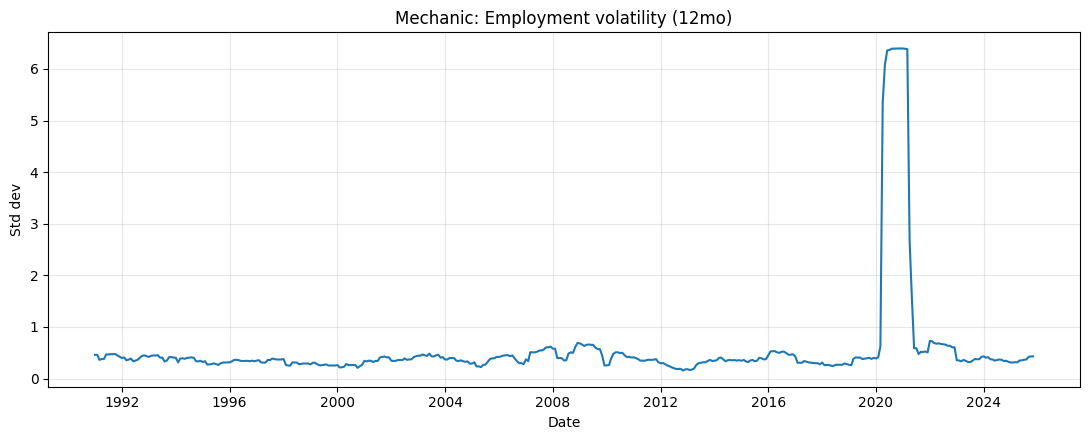

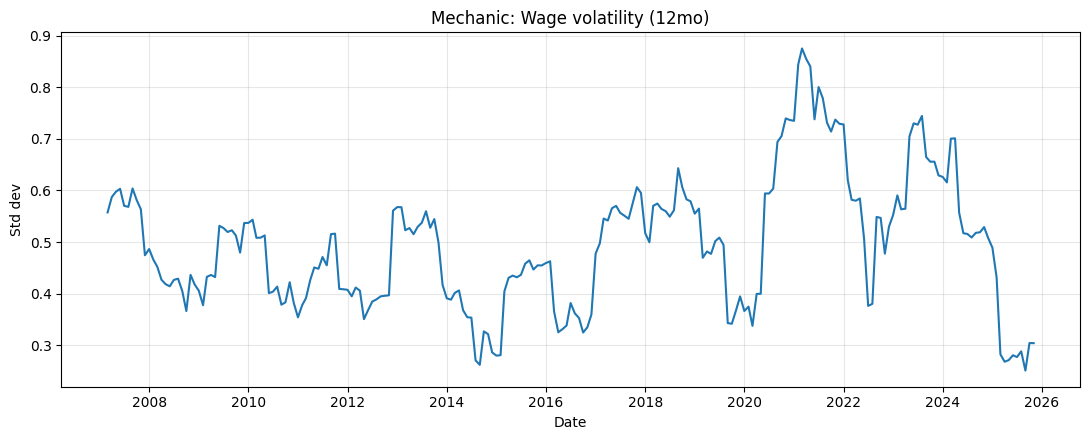

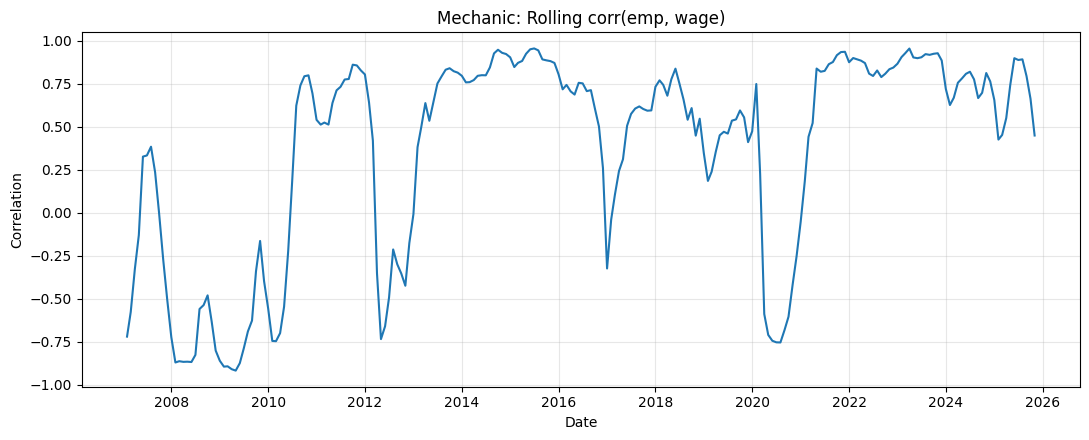

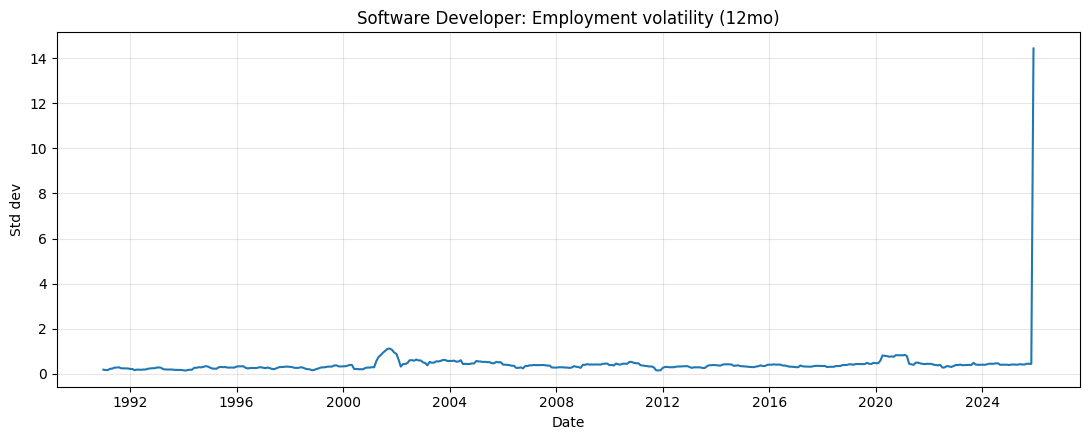

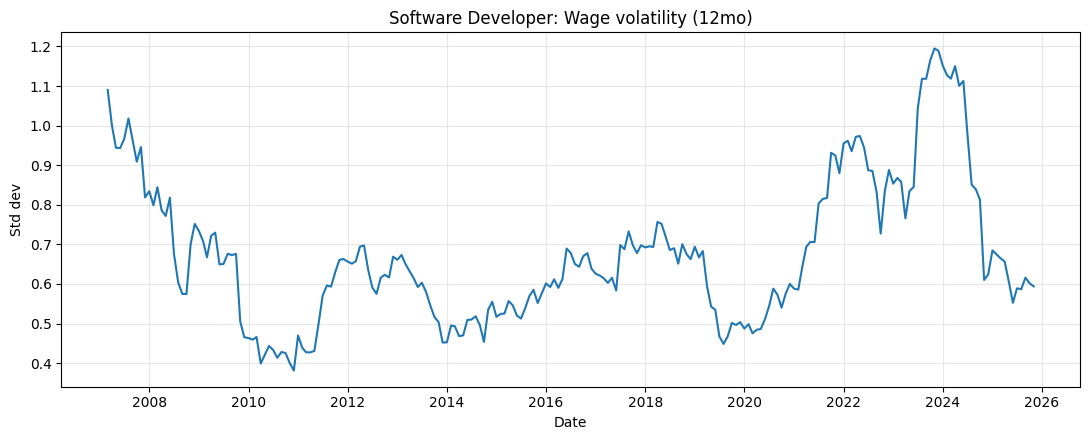

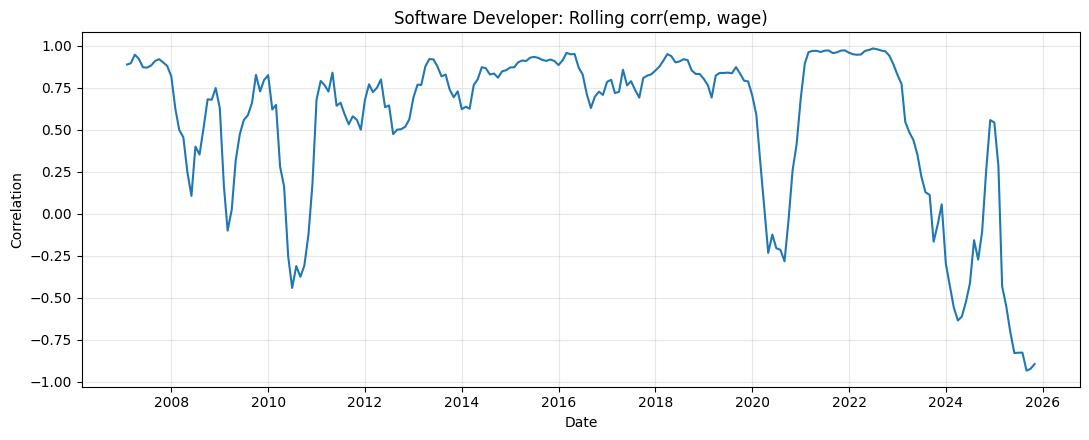

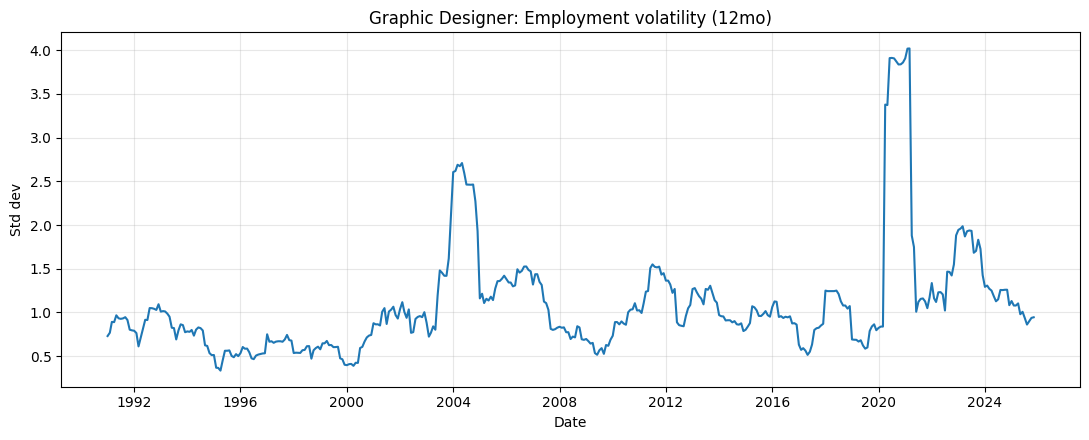

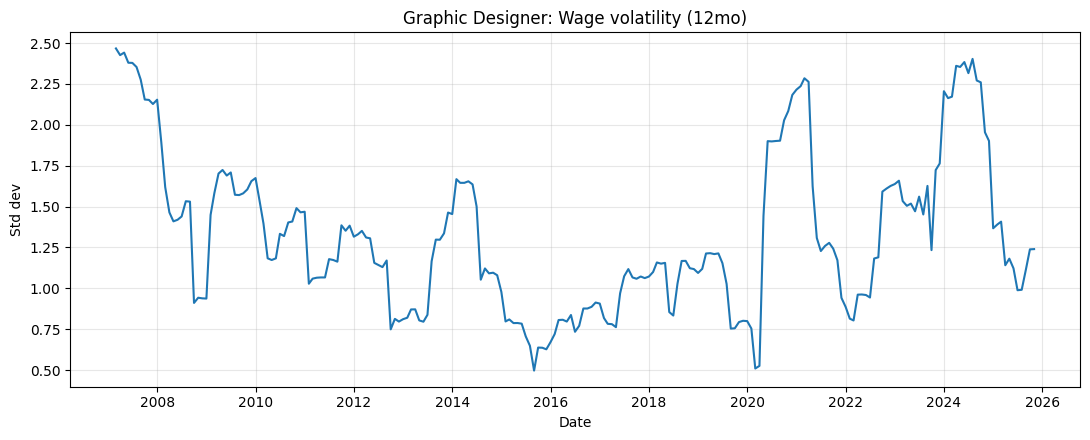

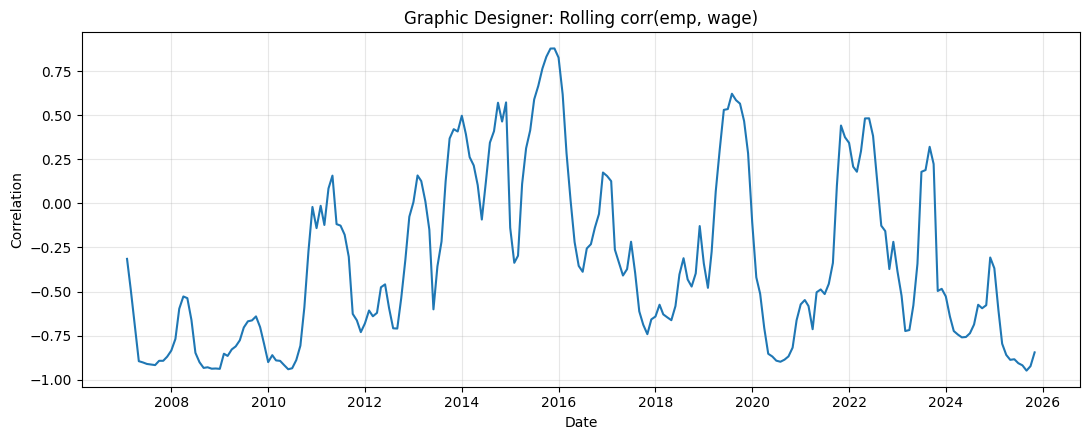

In [16]:
for name, df in CAREERS.items():
    plot_one(df, "emp_roll_std_12", f"{name}: Employment volatility (12mo)", "Std dev")
    plot_one(df, "wage_roll_std_12", f"{name}: Wage volatility (12mo)", "Std dev")

    df["roll_corr_12"] = df["employment_thousands"].rolling(12).corr(df["avg_hourly_earnings"])
    plot_one(df, "roll_corr_12", f"{name}: Rolling corr(emp, wage)", "Correlation")


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# NBER recession windows (monthly)
RECESSIONS = [
    ("1990-07-01", "1991-03-01"),  # 1990–91
    ("2001-03-01", "2001-11-01"),  # 2001
    ("2007-12-01", "2009-06-01"),  # Great Recession
    ("2020-02-01", "2020-04-01"),  # COVID recession (official)
]

# AI era shading (you can adjust this)
AI_ERA = ("2022-11-01", None)  # None = extend to end of series

def shade_periods(ax, df_index, recessions=RECESSIONS, ai_era=AI_ERA):
    # Shade recessions
    for start, end in recessions:
        ax.axvspan(pd.to_datetime(start), pd.to_datetime(end), alpha=0.18)
    # Shade AI era
    ai_start, ai_end = ai_era
    ai_start = pd.to_datetime(ai_start)
    ai_end = pd.to_datetime(ai_end) if ai_end else df_index.max()
    ax.axvspan(ai_start, ai_end, alpha=0.18)


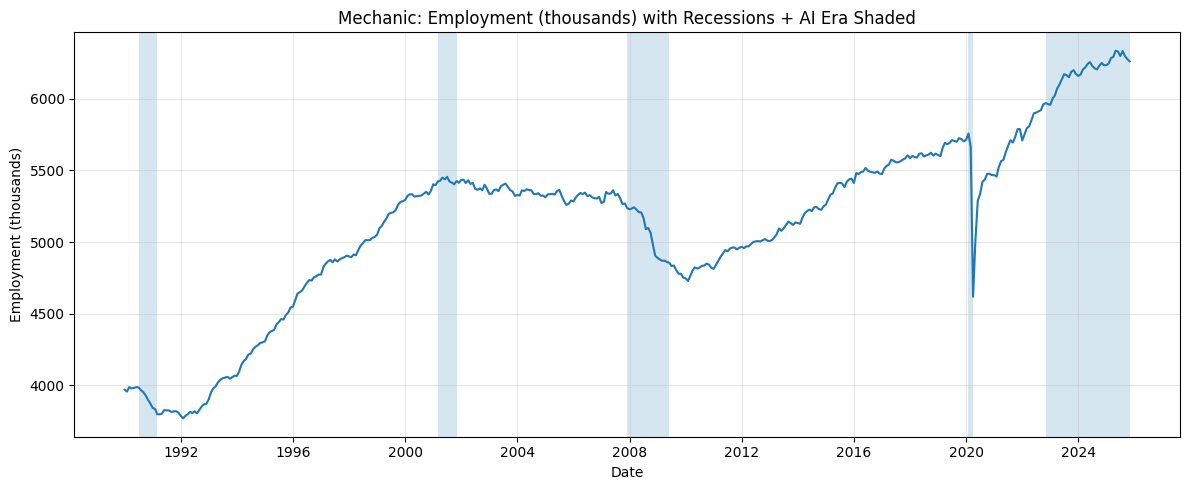

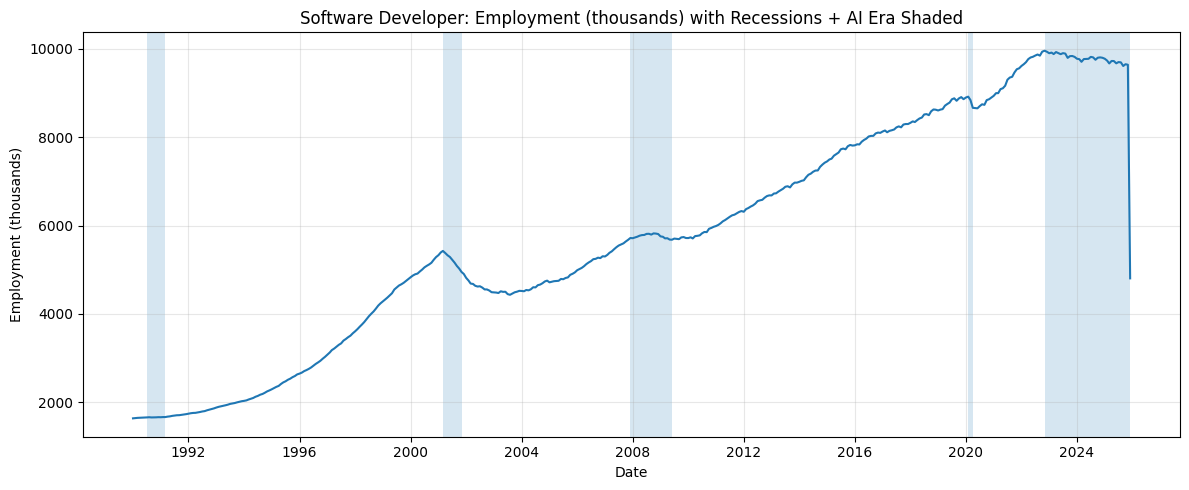

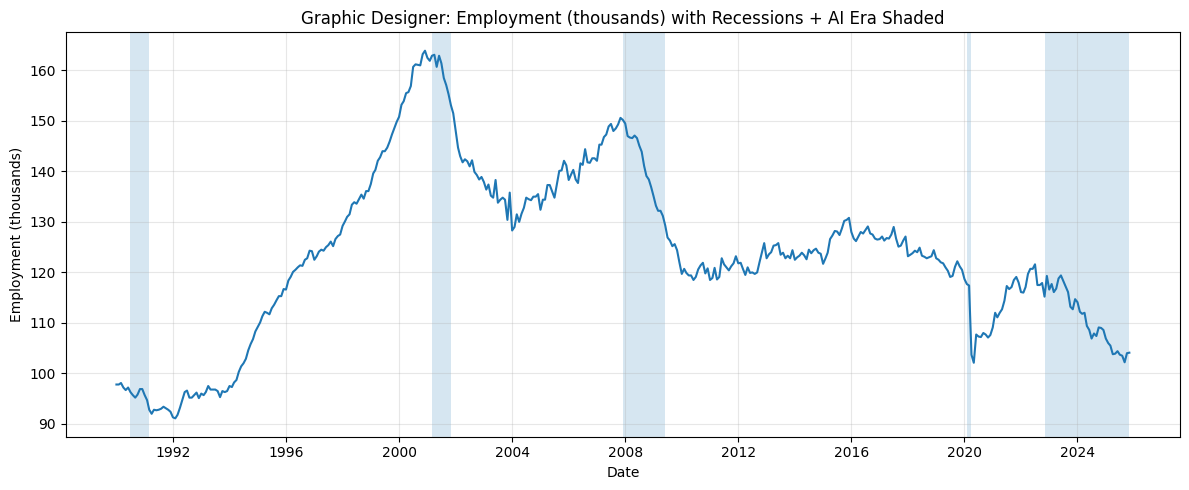

In [18]:
for name, df in CAREERS.items():
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.plot(df.index, df["employment_thousands"])
    shade_periods(ax, df.index)

    ax.set_title(f"{name}: Employment (thousands) with Recessions + AI Era Shaded")
    ax.set_xlabel("Date")
    ax.set_ylabel("Employment (thousands)")
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

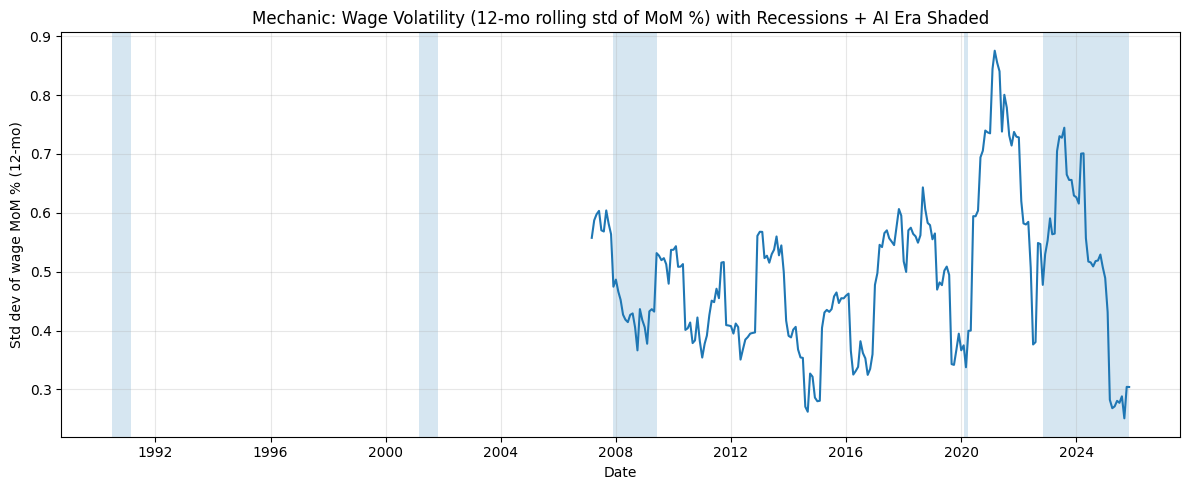

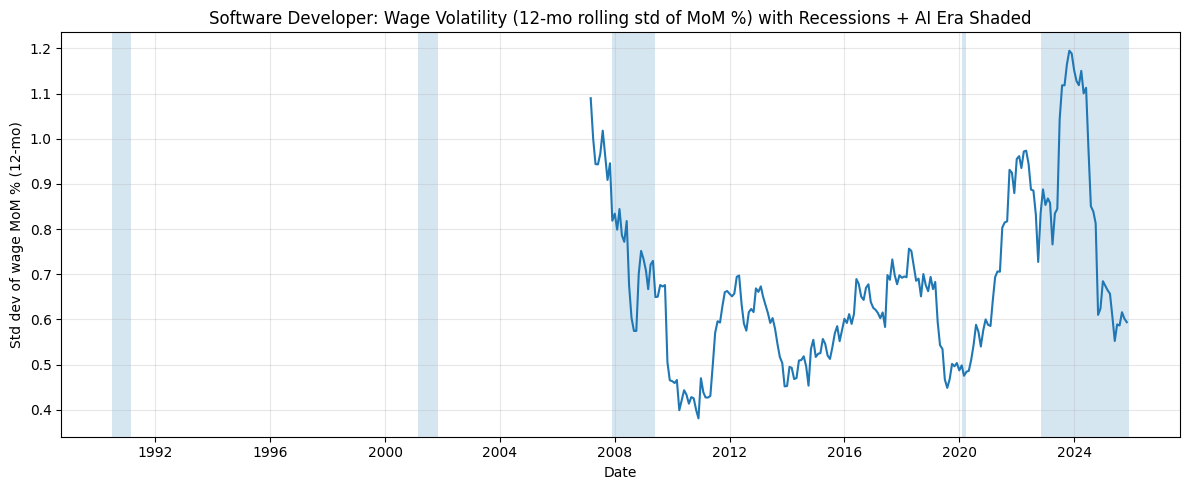

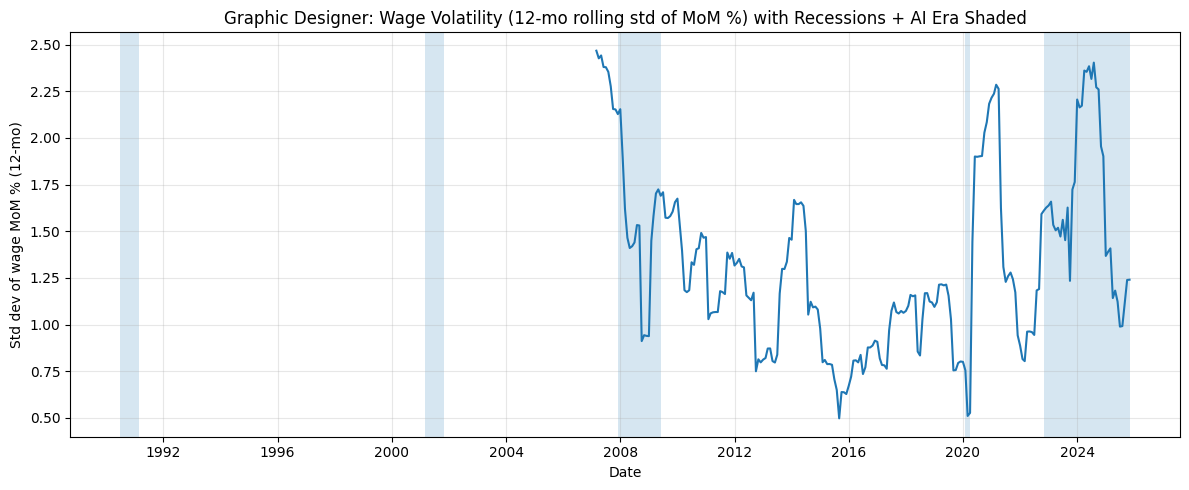

In [19]:
for name, df in CAREERS.items():
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.plot(df.index, df["wage_roll_std_12"])
    shade_periods(ax, df.index)

    ax.set_title(f"{name}: Wage Volatility (12-mo rolling std of MoM %) with Recessions + AI Era Shaded")
    ax.set_xlabel("Date")
    ax.set_ylabel("Std dev of wage MoM % (12-mo)")
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


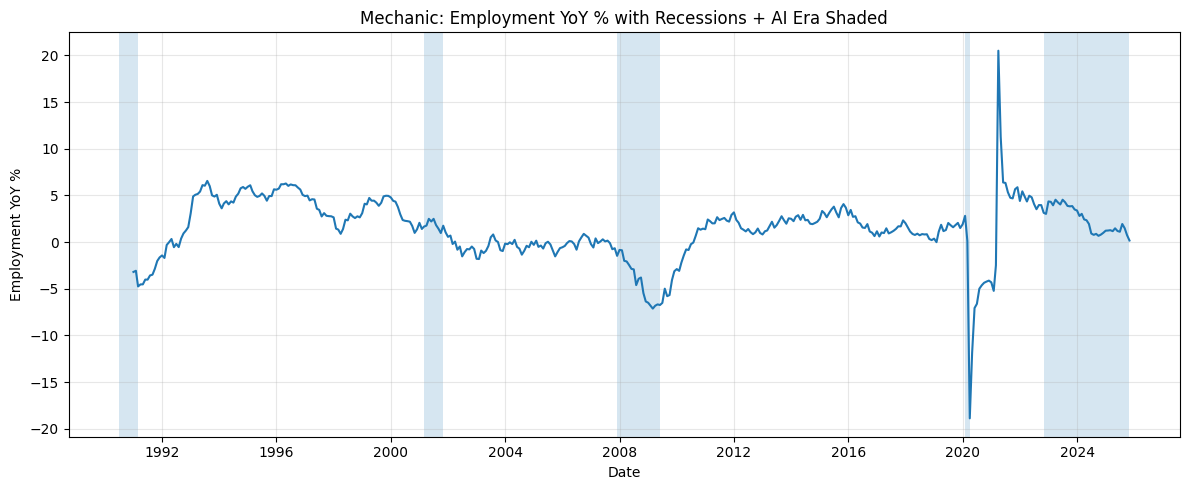

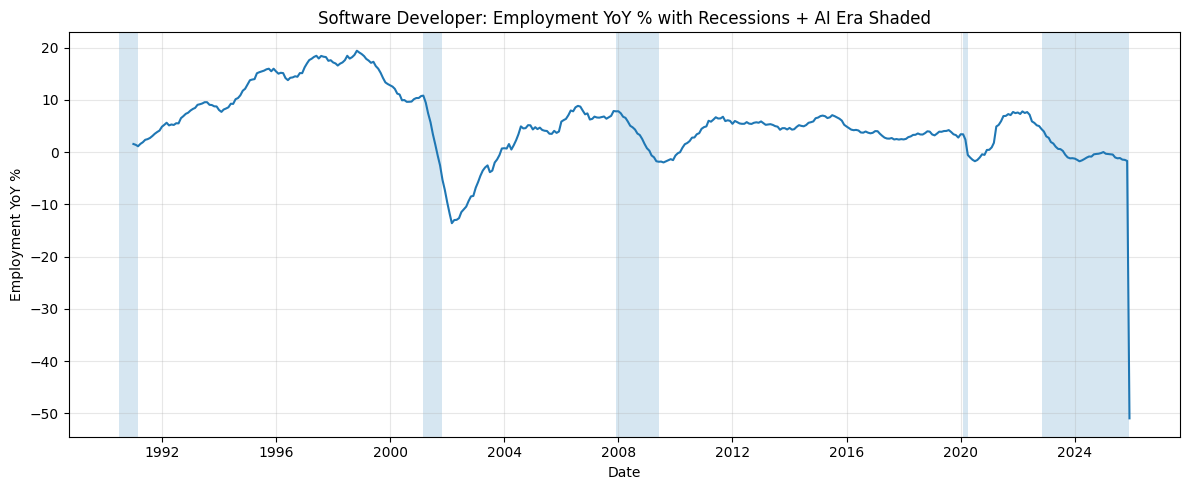

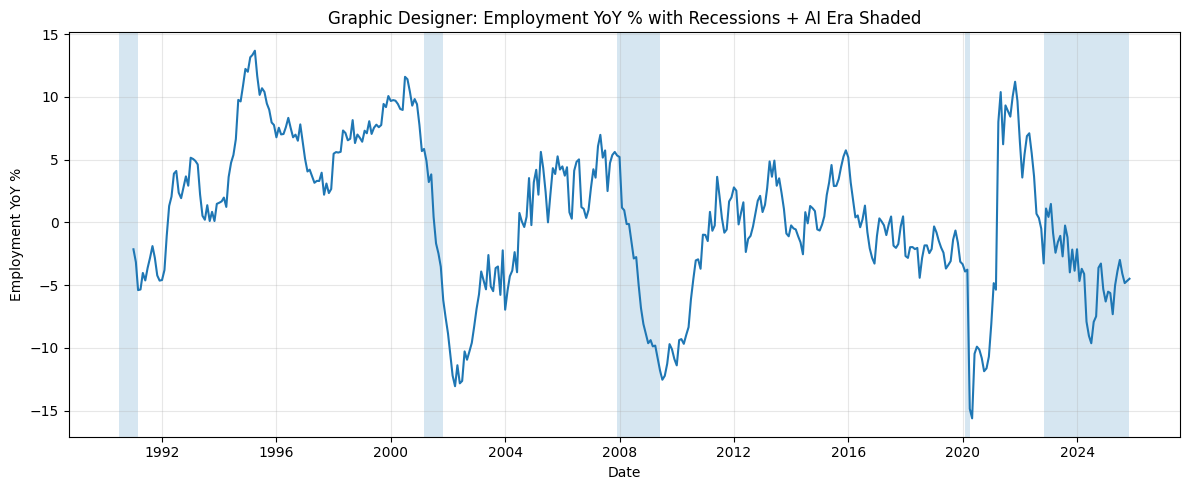

In [20]:
for name, df in CAREERS.items():
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.plot(df.index, df["emp_yoy_pct"])
    shade_periods(ax, df.index)

    ax.set_title(f"{name}: Employment YoY % with Recessions + AI Era Shaded")
    ax.set_xlabel("Date")
    ax.set_ylabel("Employment YoY %")
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

In [21]:
import plotly.graph_objects as go

# Uses existing: CAREERS (dict of DataFrames), RECESSIONS (list of (start,end)), AI_START (str like "2022-11-01")
# Assumes each df has a DatetimeIndex and columns:
#   employment_thousands, emp_yoy_pct, wage_roll_std_12

AI_START = "2022-11-01"
AI_START = pd.to_datetime("2022-11-01")

metrics = {
    "Employment (thousands)": ("employment_thousands", "Employment (thousands)"),
    "Employment YoY %": ("emp_yoy_pct", "YoY %"),
    "Wage volatility (12-mo std of MoM %)": ("wage_roll_std_12", "Std dev (12-mo)"),
}

careers = list(CAREERS.keys())
metric_names = list(metrics.keys())

# Figure
fig = go.Figure()
trace_idx = {}  # (career, metric_name) -> index

# Add traces (one per career x metric)
t = 0
for c in careers:
    df = CAREERS[c].sort_index()
    for m in metric_names:
        col, _ylab = metrics[m]
        fig.add_trace(
            go.Scatter(
                x=df.index,
                y=df[col],
                mode="lines",
                name=f"{c} — {m}",
                visible=(c == careers[0] and m == metric_names[0]),
                hovertemplate=(
                    f"<b>{c}</b><br>"
                    "Date: %{x|%Y-%m}<br>"
                    f"{m}: %{{y:.3f}}<extra></extra>"
                ),
            )
        )
        trace_idx[(c, m)] = t
        t += 1

# Shading: recessions + AI era
shapes = []
for start, end in RECESSIONS:
    shapes.append(
        dict(
            type="rect",
            xref="x", yref="paper",
            x0=pd.to_datetime(start), x1=pd.to_datetime(end),
            y0=0, y1=1,
            line=dict(width=0),
            fillcolor="rgba(0,0,0,0.12)",
        )
    )

ai0 = pd.to_datetime(AI_START)
ai1 = max(df.index.max() for df in CAREERS.values())
shapes.append(
    dict(
        type="rect",
        xref="x", yref="paper",
        x0=ai0, x1=ai1,
        y0=0, y1=1,
        line=dict(width=0),
        fillcolor="rgba(0,0,0,0.12)",
    )
)

# Combined dropdown (career | metric)
buttons = []
for c in careers:
    for m in metric_names:
        vis = [False] * len(fig.data)
        vis[trace_idx[(c, m)]] = True
        buttons.append(
            dict(
                label=f"{c} | {m}",
                method="update",
                args=[
                    {"visible": vis},
                    {
                        "title": f"{c}: {m} (Recessions + AI Era Shaded)",
                        "yaxis": {"title": metrics[m][1]},
                    },
                ],
            )
        )

fig.update_layout(
    title=f"{careers[0]}: {metric_names[0]} (Recessions + AI Era Shaded)",
    xaxis_title="Date",
    yaxis_title=metrics[metric_names[0]][1],
    shapes=shapes,
    hovermode="x unified",
    template="plotly_white",
    height=560,
    updatemenus=[
        dict(
            buttons=buttons,
            direction="down",
            x=0.01,
            xanchor="left",
            y=1.15,
            yanchor="top",
            showactive=True,
        )
    ],
)

fig.show()


In [22]:
from pathlib import Path
import pandas as pd

AI_CSV_PATH = Path(r"C:\Users\whoop\PycharmProjects\PythonProject2\bls_ces\data_external\ai_intensity_monthly_smoothed.csv")

def load_ai_series_index(ai_csv_path: Path) -> pd.DataFrame:
    ai = pd.read_csv(ai_csv_path)
    ai["month"] = pd.to_datetime(ai["month"], errors="coerce")
    # align to SAME convention as your employment index (month-end in your screenshot: 1970-01-31)
    ai["month"] = ai["month"].dt.to_period("M").dt.to_timestamp("M")  # month-end
    ai = ai.dropna(subset=["month"]).sort_values("month").set_index("month")
    return ai[["ai_share_monthly", "ai_share_smoothed"]]

def merge_ai_into_indexed_dfs(
    cleaned_dfs: dict[str, pd.DataFrame],
    ai_idx: pd.DataFrame,
    prefix: str = "gdelt_",
    fill_pre_ai: str = "keep_nan",  # "keep_nan" or "zero"
) -> dict[str, pd.DataFrame]:
    out = {}
    for name, df in cleaned_dfs.items():
        df2 = df.copy()

        # Expect a DatetimeIndex already; do NOT touch any columns.
        idx = pd.to_datetime(df2.index, errors="coerce")
        idx = idx.to_period("M").to_timestamp("M")  # month-end to match your data
        df2.index = idx
        df2 = df2[~df2.index.isna()].sort_index()

        # Join exog by index
        merged = df2.join(ai_idx, how="left").rename(columns={
            "ai_share_monthly": f"{prefix}ai_share_monthly",
            "ai_share_smoothed": f"{prefix}ai_share_smoothed",
        })

        if fill_pre_ai == "zero":
            merged[f"{prefix}ai_share_monthly"] = merged[f"{prefix}ai_share_monthly"].fillna(0.0)
            merged[f"{prefix}ai_share_smoothed"] = merged[f"{prefix}ai_share_smoothed"].fillna(0.0)

        out[name] = merged

    return out

# ---- Run the safe merge ----
ai_idx = load_ai_series_index(AI_CSV_PATH)

cleaned_dfs_with_ai = merge_ai_into_indexed_dfs(
    cleaned_dfs=cleaned_dfs,     # use your ORIGINAL good dict
    ai_idx=ai_idx,
    prefix="gdelt_",
    fill_pre_ai="keep_nan",      # change to "zero" when ready
)

# Sanity check: employment should still be numeric
for k in cleaned_dfs_with_ai:
    assert pd.api.types.is_numeric_dtype(cleaned_dfs_with_ai[k]["employment_thousands"]), f"{k} employment got corrupted!"
print("[OK] employment_thousands stayed numeric in all dfs.")

display(cleaned_dfs_with_ai["mechanic_monthly_ces.csv"].head())
display(cleaned_dfs_with_ai["mechanic_monthly_ces.csv"].tail())


[OK] employment_thousands stayed numeric in all dfs.


,employment_thousands,avg_hourly_earnings,gdelt_ai_share_monthly,gdelt_ai_share_smoothed
date,,,,
1990-01-31,3970.1,NaN,NaN,NaN
1990-02-28,3956.8,NaN,NaN,NaN
1990-03-31,3988.1,NaN,NaN,NaN
1990-04-30,3978.8,NaN,NaN,NaN
1990-05-31,3982.8,NaN,NaN,NaN


,employment_thousands,avg_hourly_earnings,gdelt_ai_share_monthly,gdelt_ai_share_smoothed
date,,,,
2025-07-31,6297.9,28.897708,0.017370,0.017086
2025-08-31,6333.3,29.097388,0.017489,0.017247
2025-09-30,6296.8,29.194461,0.019842,0.018233
2025-10-31,6276.3,29.118499,0.021738,0.019689
2025-11-30,6260.6,29.275956,0.021769,0.021116


In [23]:
print("Mechanic Data with Exogenous")
display(cleaned_dfs_with_ai["mechanic_monthly_ces.csv"].head())
display(cleaned_dfs_with_ai["mechanic_monthly_ces.csv"].tail())

print("Graphic Designer Data with Exogenous")
display(cleaned_dfs_with_ai["graphic_designer_monthly_ces.csv"].head())
display(cleaned_dfs_with_ai["graphic_designer_monthly_ces.csv"].tail())

print("Software Developer Data with Exogenous")
display(cleaned_dfs_with_ai["software_developer_monthly_ces.csv"].head())
display(cleaned_dfs_with_ai["software_developer_monthly_ces.csv"].tail())


Mechanic Data with Exogenous


,employment_thousands,avg_hourly_earnings,gdelt_ai_share_monthly,gdelt_ai_share_smoothed
date,,,,
1990-01-31,3970.1,NaN,NaN,NaN
1990-02-28,3956.8,NaN,NaN,NaN
1990-03-31,3988.1,NaN,NaN,NaN
1990-04-30,3978.8,NaN,NaN,NaN
1990-05-31,3982.8,NaN,NaN,NaN


,employment_thousands,avg_hourly_earnings,gdelt_ai_share_monthly,gdelt_ai_share_smoothed
date,,,,
2025-07-31,6297.9,28.897708,0.017370,0.017086
2025-08-31,6333.3,29.097388,0.017489,0.017247
2025-09-30,6296.8,29.194461,0.019842,0.018233
2025-10-31,6276.3,29.118499,0.021738,0.019689
2025-11-30,6260.6,29.275956,0.021769,0.021116


Graphic Designer Data with Exogenous


,employment_thousands,avg_hourly_earnings,gdelt_ai_share_monthly,gdelt_ai_share_smoothed
date,,,,
1990-01-31,97.8,NaN,NaN,NaN
1990-02-28,97.8,NaN,NaN,NaN
1990-03-31,98.1,NaN,NaN,NaN
1990-04-30,97.2,NaN,NaN,NaN
1990-05-31,96.7,NaN,NaN,NaN


,employment_thousands,avg_hourly_earnings,gdelt_ai_share_monthly,gdelt_ai_share_smoothed
date,,,,
2025-07-31,103.7,47.810,0.017370,0.017086
2025-08-31,103.5,47.195,0.017489,0.017247
2025-09-30,102.2,48.490,0.019842,0.018233
2025-10-31,104.0,48.065,0.021738,0.019689
2025-11-30,104.1,48.970,0.021769,0.021116


Software Developer Data with Exogenous


,employment_thousands,avg_hourly_earnings,gdelt_ai_share_monthly,gdelt_ai_share_smoothed
date,,,,
1990-01-31,1637.6,NaN,NaN,NaN
1990-02-28,1644.0,NaN,NaN,NaN
1990-03-31,1648.2,NaN,NaN,NaN
1990-04-30,1650.5,NaN,NaN,NaN
1990-05-31,1651.4,NaN,NaN,NaN


,employment_thousands,avg_hourly_earnings,gdelt_ai_share_monthly,gdelt_ai_share_smoothed
date,,,,
2025-08-31,9695.2,62.033320,0.017489,0.017247
2025-09-30,9612.7,62.898521,0.019842,0.018233
2025-10-31,9653.3,62.974037,0.021738,0.019689
2025-11-30,9641.1,63.261636,0.021769,0.021116
2025-12-31,4806.2,NaN,0.020734,0.021414


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import yeojohnson

# Periodogram: try statsmodels first, fall back to scipy.signal
try:
    from statsmodels.tsa.stattools import periodogram as sm_periodogram
    _HAS_SM_PERIODOGRAM = True
except Exception:
    _HAS_SM_PERIODOGRAM = False
    from scipy.signal import periodogram as sp_periodogram


def infer_date_col(df: pd.DataFrame) -> str | None:
    """
    If the index is datetime-like, return None (meaning: use index).
    Otherwise infer a date column from df.columns.
    """
    # Prefer datetime-like index
    if isinstance(df.index, (pd.DatetimeIndex, pd.PeriodIndex)):
        return None

    # If it's not a RangeIndex, try parsing index too
    if not isinstance(df.index, pd.RangeIndex):
        idx = pd.to_datetime(df.index, errors="coerce")
        if idx.notna().mean() > 0.9:
            return None

    # Otherwise search common date column names
    for c in df.columns:
        if str(c).lower() in ("date", "month", "period", "time"):
            return c

    # Fallback: best datetime parse rate among columns
    best_col, best_rate = None, 0.0
    for c in df.columns:
        s = pd.to_datetime(df[c], errors="coerce")
        rate = s.notna().mean()
        if rate > best_rate:
            best_rate, best_col = rate, c

    if best_col is None or best_rate < 0.5:
        raise ValueError("Could not infer date/month column and index is not datetime-like. Pass date_col explicitly.")
    return best_col


def ensure_monthly_index(
    df: pd.DataFrame,
    date_col: str | None,
    dedupe_rule: str = "mean",   # "mean" | "sum" | "last"
    force_complete_month_grid: bool = False
) -> pd.DataFrame:
    """
    Handles date stored either as a column OR already as the index.
    - Converts to month-start (M)
    - Sets as index
    - De-dupes duplicate months
    """
    out = df.copy()

    # Case A: date is the index
    if date_col is None:
        idx = pd.to_datetime(out.index, errors="coerce")
        idx = idx.to_period("M").to_timestamp(how="start")
        out.index = idx
        out = out[~out.index.isna()].sort_index()

    # Case B: date is a column
    else:
        if date_col not in out.columns:
            raise KeyError(f"date_col='{date_col}' not found in columns: {list(out.columns)}")
        out[date_col] = pd.to_datetime(out[date_col], errors="coerce").dt.to_period("M").dt.to_timestamp(how="start")
        out = out.dropna(subset=[date_col]).sort_values(date_col).set_index(date_col)

    # De-dupe duplicate month rows
    if not out.index.is_unique:
        if dedupe_rule == "mean":
            out = out.groupby(out.index).mean(numeric_only=True)
        elif dedupe_rule == "sum":
            out = out.groupby(out.index).sum(numeric_only=True)
        elif dedupe_rule == "last":
            out = out.groupby(out.index).last()
        else:
            raise ValueError("dedupe_rule must be one of: 'mean', 'sum', 'last'")
        out = out.sort_index()

    if force_complete_month_grid and len(out.index) > 0:
        full_idx = pd.date_range(out.index.min(), out.index.max(), freq="M")
        out = out.reindex(full_idx)

    return out


def adf_test(x: pd.Series, autolag: str = "AIC") -> dict:
    x = x.dropna()
    if len(x) < 20:
        return {"adf_stat": np.nan, "adf_pvalue": np.nan, "adf_usedlag": np.nan, "adf_nobs": int(len(x))}
    res = adfuller(x.values, autolag=autolag)
    return {"adf_stat": float(res[0]), "adf_pvalue": float(res[1]), "adf_usedlag": int(res[2]), "adf_nobs": int(res[3])}


def kpss_test(x: pd.Series, regression: str = "c", nlags: str = "auto") -> dict:
    x = x.dropna()
    if len(x) < 20:
        return {"kpss_stat": np.nan, "kpss_pvalue": np.nan, "kpss_lags": np.nan, "kpss_nobs": int(len(x))}
    try:
        stat, pval, lags, crit = kpss(x.values, regression=regression, nlags=nlags)
        return {"kpss_stat": float(stat), "kpss_pvalue": float(pval), "kpss_lags": int(lags), "kpss_nobs": int(len(x))}
    except Exception:
        return {"kpss_stat": np.nan, "kpss_pvalue": np.nan, "kpss_lags": np.nan, "kpss_nobs": int(len(x))}


def stationarity_report(x: pd.Series, label: str) -> dict:
    out = {"stage": label, "n": int(x.dropna().shape[0])}
    out.update(adf_test(x))
    out.update(kpss_test(x))
    return out


def yeo_johnson_transform(x: pd.Series) -> tuple[pd.Series, float]:
    x = x.astype(float)
    arr = x.to_numpy()
    mask = np.isfinite(arr)
    if mask.sum() < 5:
        return x.copy(), np.nan
    transformed_vals, lam = yeojohnson(arr[mask])
    out = x.copy()
    out.iloc[np.flatnonzero(mask)] = transformed_vals
    return out, float(lam)


def estimate_seasonal_period_months(x: pd.Series, min_period: int = 2, max_period: int = 24) -> int:
    x = x.dropna().astype(float)
    if len(x) < 36:
        return 12
    x0 = x.values - np.mean(x.values)

    if _HAS_SM_PERIODOGRAM:
        freqs, pxx = sm_periodogram(x0)
    else:
        freqs, pxx = sp_periodogram(x0, fs=1.0, scaling="spectrum")

    freqs = np.asarray(freqs)
    pxx = np.asarray(pxx)

    mask = (freqs > 0) & np.isfinite(pxx)
    freqs, pxx = freqs[mask], pxx[mask]
    if len(freqs) == 0:
        return 12

    periods = 1.0 / freqs
    band = (periods >= min_period) & (periods <= max_period)

    if band.sum() == 0:
        peak_idx = int(np.argmax(pxx))
        p = int(round(periods[peak_idx]))
        return int(np.clip(p, min_period, max_period))

    idx_band = np.where(band)[0]
    peak_idx = idx_band[int(np.argmax(pxx[idx_band]))]
    p = int(round(periods[peak_idx]))
    return int(np.clip(p, min_period, max_period))


def seasonal_difference(x: pd.Series, s: int) -> pd.Series:
    return x - x.shift(s)

def first_difference(x: pd.Series) -> pd.Series:
    return x.diff(1)


def run_series_diagnostics(
    df: pd.DataFrame,
    date_col: str | None = None,
    y_col: str | None = None,
    seasonal_period: int | None = None,
    min_period: int = 2,
    max_period: int = 24,
    nlags_acf_pacf: int = 48,
    dedupe_rule: str = "mean",
    force_complete_month_grid: bool = False,
    title_prefix: str = "",
) -> dict:
    # If date_col is None, infer_date_col will return None (use index) if index is datetime-like.
    if date_col is None:
        date_col = infer_date_col(df)

    df_m = ensure_monthly_index(
        df,
        date_col=date_col,
        dedupe_rule=dedupe_rule,
        force_complete_month_grid=force_complete_month_grid
    )

    # If user didn't specify y_col, pick a numeric col with most coverage (excluding exog)
    if y_col is None:
        excluded = {"gdelt_ai_share_monthly", "gdelt_ai_share_smoothed"}
        numeric_cols = [c for c in df_m.columns if c not in excluded and pd.api.types.is_numeric_dtype(df_m[c])]
        if not numeric_cols:
            raise ValueError("Could not infer numeric target column. Pass y_col explicitly.")
        y_col = max(numeric_cols, key=lambda c: df_m[c].notna().sum())

    if y_col not in df_m.columns:
        raise ValueError(f"Target column '{y_col}' not found. Available: {list(df_m.columns)}")

    y = df_m[y_col].astype(float)

    report = []
    report.append(stationarity_report(y, "raw"))

    y_yj, lam = yeo_johnson_transform(y)
    report.append(stationarity_report(y_yj, "yeo_johnson"))

    if seasonal_period is None:
        s_est = estimate_seasonal_period_months(y_yj, min_period=min_period, max_period=max_period)
    else:
        s_est = int(seasonal_period)

    y_seas = seasonal_difference(y_yj, s_est)
    report.append(stationarity_report(y_seas, f"seasonal_diff(s={s_est})"))

    y_diff1 = first_difference(y_seas)
    report.append(stationarity_report(y_diff1, "first_diff"))

    report_df = pd.DataFrame(report)

    xplot = y_diff1.dropna()
    if len(xplot) >= 20:
        fig = plt.figure(figsize=(10, 4))
        ax1 = fig.add_subplot(1, 2, 1)
        plot_acf(xplot, ax=ax1, lags=nlags_acf_pacf, zero=False)
        ax1.set_title(f"{title_prefix}ACF (after seasonal + first diff)")

        ax2 = fig.add_subplot(1, 2, 2)
        plot_pacf(xplot, ax=ax2, lags=nlags_acf_pacf, zero=False, method="ywm")
        ax2.set_title(f"{title_prefix}PACF (after seasonal + first diff)")

        plt.tight_layout()
        plt.show()
    else:
        print(f"[WARN] Not enough points for ACF/PACF after differencing. n={len(xplot)}")

    return {
        "date_col_used": date_col,
        "y_col": y_col,
        "lambda_yj": lam,
        "seasonal_period": s_est,
        "report_df": report_df,
        "series": {
            "raw": y,
            "yeo_johnson": y_yj,
            "seasonal_diff": y_seas,
            "first_diff": y_diff1,
        },
    }


def run_diagnostics_for_all(
    dfs: dict[str, pd.DataFrame],
    keys: list[str] | None = None,
    date_col: str | None = None,
    y_col: str | None = None,
    seasonal_period: int | None = None,
    **kwargs
) -> dict[str, dict]:
    if keys is None:
        keys = list(dfs.keys())

    out = {}
    for k in keys:
        if k not in dfs:
            print(f"[SKIP] Missing key: {k}")
            continue

        print(f"\n========================\nDiagnostics: {k}\n========================")
        res = run_series_diagnostics(
            dfs[k],
            date_col=date_col,
            y_col=y_col,
            seasonal_period=seasonal_period,
            title_prefix=f"{k} | ",
            **kwargs
        )
        display(res["report_df"])
        out[k] = res

    return out



Diagnostics: mechanic_monthly_ces.csv


C:\Users\whoop\AppData\Local\Temp\ipykernel_4588\770085955.py:111: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


C:\Users\whoop\AppData\Local\Temp\ipykernel_4588\770085955.py:111: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


C:\Users\whoop\AppData\Local\Temp\ipykernel_4588\770085955.py:111: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\whoop\AppData\Local\Temp\ipykernel_4588\770085955.py:111: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




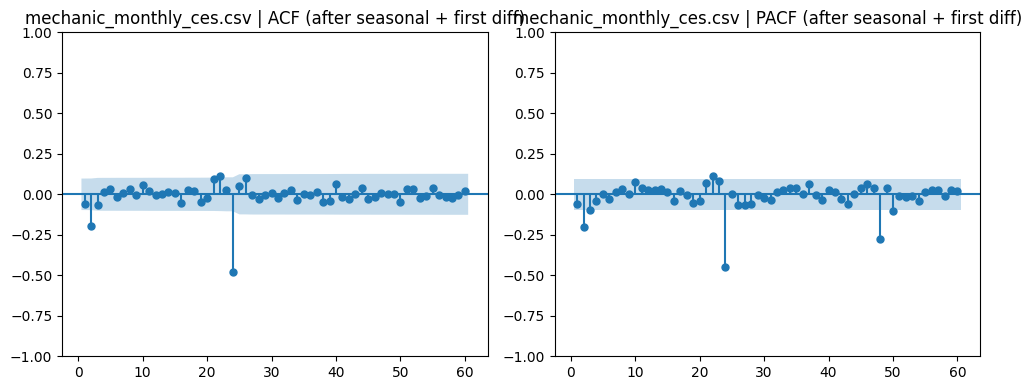

,stage,n,adf_stat,adf_pvalue,adf_usedlag,adf_nobs,kpss_stat,kpss_pvalue,kpss_lags,kpss_nobs
0,raw,431,-0.816466,8.142374e-01,2,428,2.277372,0.01,12,431
1,yeo_johnson,431,-0.317702,9.229595e-01,2,428,2.305265,0.01,12,431
2,seasonal_diff(s=24),407,-2.567164,9.997539e-02,3,403,0.337261,0.10,11,407
3,first_diff,406,-14.615571,3.959358e-27,2,403,0.052236,0.10,19,406


C:\Users\whoop\AppData\Local\Temp\ipykernel_4588\770085955.py:111: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.





Diagnostics: graphic_designer_monthly_ces.csv


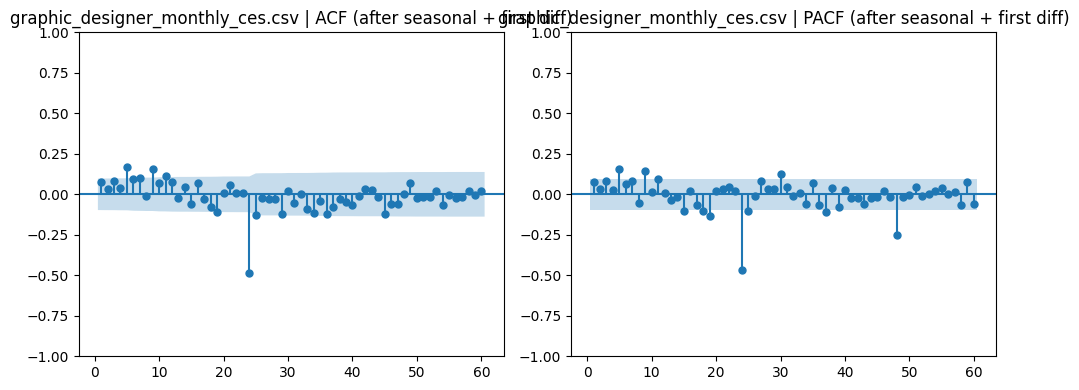

,stage,n,adf_stat,adf_pvalue,adf_usedlag,adf_nobs,kpss_stat,kpss_pvalue,kpss_lags,kpss_nobs
0,raw,431,-1.844226,0.358736,6,424,0.576742,0.024751,12,431
1,yeo_johnson,431,-1.818192,0.371468,6,424,0.583962,0.024094,12,431
2,seasonal_diff(s=24),407,-4.236774,0.000571,11,395,0.670547,0.016223,12,407
3,first_diff,406,-4.924924,0.000031,18,387,0.081531,0.100000,5,406


C:\Users\whoop\AppData\Local\Temp\ipykernel_4588\770085955.py:111: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


C:\Users\whoop\AppData\Local\Temp\ipykernel_4588\770085955.py:111: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


C:\Users\whoop\AppData\Local\Temp\ipykernel_4588\770085955.py:111: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.





Diagnostics: software_developer_monthly_ces.csv


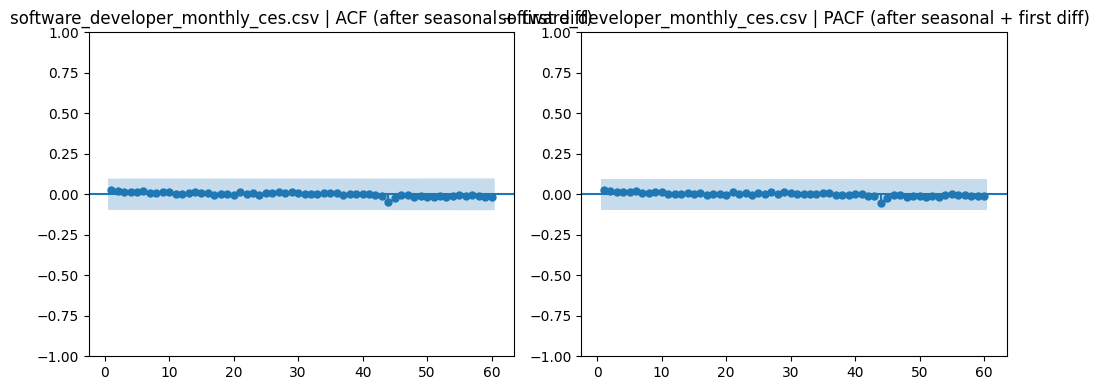

,stage,n,adf_stat,adf_pvalue,adf_usedlag,adf_nobs,kpss_stat,kpss_pvalue,kpss_lags,kpss_nobs
0,raw,432,-1.606662,0.480246,3,428,3.285508,0.010000,12,432
1,yeo_johnson,432,-1.486554,0.540152,3,428,3.268927,0.010000,12,432
2,seasonal_diff(s=24),408,1.193842,0.995943,1,406,0.215724,0.100000,11,408
3,first_diff,407,-0.926616,0.779081,0,406,0.434498,0.062286,2,407


In [25]:
results_diag = run_diagnostics_for_all(
    cleaned_dfs_with_ai,
    keys=[
        "mechanic_monthly_ces.csv",
        "graphic_designer_monthly_ces.csv",
        "software_developer_monthly_ces.csv",
    ],
    date_col=None,                 # ✅ uses DatetimeIndex correctly now
    y_col="employment_thousands",  # ✅ your real target
    nlags_acf_pacf=60,
    min_period=2,
    max_period=24,
)



Fitting: mechanic_monthly_ces.csv
Best order: (0, 1, 1) seasonal: (0, 1, 1, 12) AIC: 4500.15
Exog RW params (last 60 mo): mu=0.00029536, sigma=0.000666834


,p10,p50,p90
2025-12-31,6246.515320,6271.420542,6296.067230
2026-01-31,6230.476897,6264.443301,6300.277980
2026-02-28,6241.870480,6283.561641,6326.126645
2026-03-31,6255.336805,6306.600107,6352.325168
2026-04-30,6233.585448,6288.804448,6343.161024


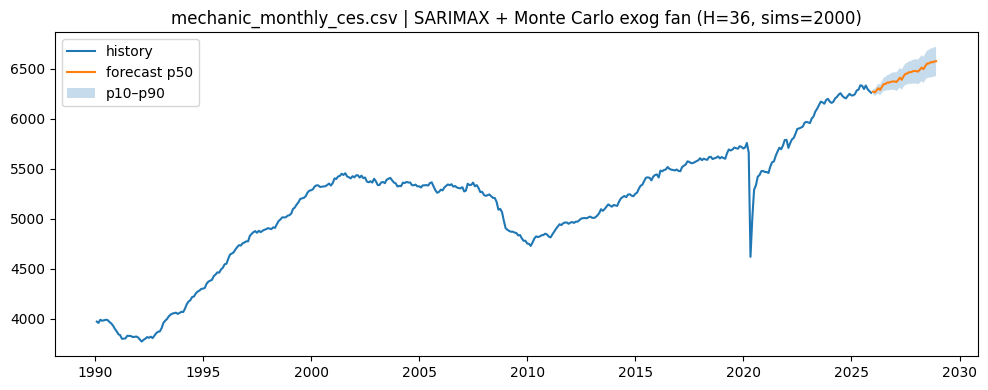


Fitting: graphic_designer_monthly_ces.csv
Best order: (0, 1, 1) seasonal: (0, 1, 1, 12) AIC: 1542.46
Exog RW params (last 60 mo): mu=0.00029536, sigma=0.000666834


,p10,p50,p90
2025-12-31,103.836902,104.338803,104.830831
2026-01-31,101.951418,102.667021,103.386076
2026-02-28,101.737933,102.615580,103.490138
2026-03-31,101.494586,102.504525,103.493841
2026-04-30,101.022792,102.184284,103.287905


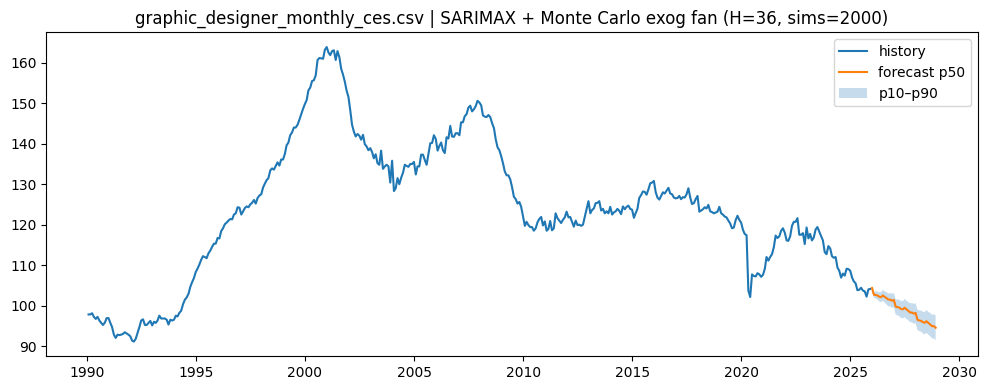


Fitting: software_developer_monthly_ces.csv
Best order: (0, 1, 1) seasonal: (0, 1, 1, 12) AIC: 5601.17
Exog RW params (last 60 mo): mu=0.000300007, sigma=0.00066586


,p10,p50,p90
2026-01-31,2210.217454,2227.188891,2244.546847
2026-02-28,2178.896348,2203.665007,2227.852620
2026-03-31,2105.941264,2136.403746,2166.061862
2026-04-30,2128.460939,2161.267041,2196.578886
2026-05-31,2097.215923,2135.043710,2175.392644


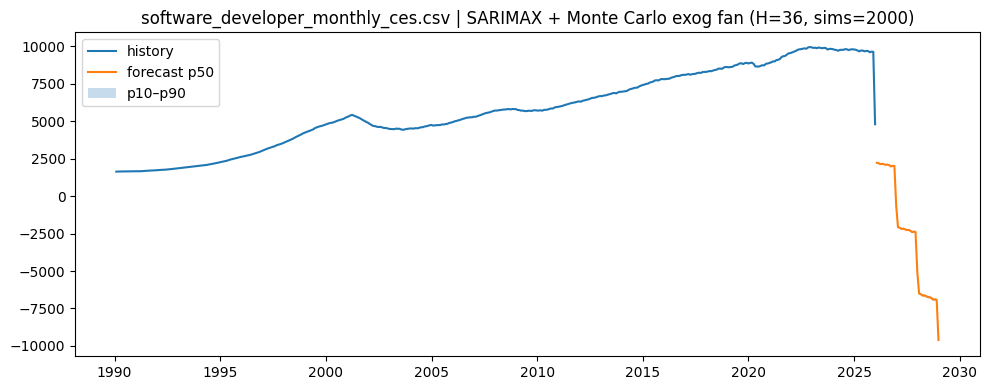

In [29]:
# ============================================================
# NEXT STEP: Fit SARIMAX + Exogenous + Monte Carlo fan forecasts
# Uses your diagnostics choice: d=1, D=1, seasonal_period=s=24
# Exog: gdelt_ai_share_smoothed (fill NaNs -> 0)
#
# Assumes you have: cleaned_dfs_with_ai (dict[str, pd.DataFrame])
# with DatetimeIndex at monthly frequency and columns:
#   - employment_thousands  (target)
#   - gdelt_ai_share_smoothed (exog)
#
# This cell:
#   1) standardizes index to MS and fills exog NaNs with 0
#   2) fits SARIMAX for each profession (small model set, picks best AIC)
#   3) runs Monte Carlo by simulating future exog paths (RW+drift)
#   4) outputs forecast quantiles + optional plots
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX

# ----------------------------
# User knobs
# ----------------------------
KEYS = [
    "mechanic_monthly_ces.csv",
    "graphic_designer_monthly_ces.csv",
    "software_developer_monthly_ces.csv",
]

Y_COL = "employment_thousands"
EXOG_COL = "gdelt_ai_share_smoothed"

SEASONAL_PERIOD = 12
D = 1
d = 1

H = 36          # forecast horizon (months)
MC_SIMS = 2000  # Monte Carlo sims
EXOG_FIT_WINDOW = 60  # months to estimate drift/vol from recent exog

# Candidate model orders to try (keep small + interpretable)
CANDIDATE_ORDERS = [
    ((1, d, 0), (0, D, 1, SEASONAL_PERIOD)),
    ((0, d, 1), (0, D, 1, SEASONAL_PERIOD)),
    ((1, d, 1), (0, D, 1, SEASONAL_PERIOD)),
    ((1, d, 0), (1, D, 0, SEASONAL_PERIOD)),
    ((0, d, 1), (1, D, 0, SEASONAL_PERIOD)),
]

PLOT_FANS = True


# ----------------------------
# Data prep helpers
# ----------------------------
def to_month_start_index(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()
    idx = pd.to_datetime(out.index, errors="coerce")
    idx = idx.to_period("M").to_timestamp("M")
    out.index = idx
    out = out[~out.index.isna()].sort_index()
    # de-dupe duplicate months if any
    if not out.index.is_unique:
        out = out.groupby(out.index).mean(numeric_only=True).sort_index()
    return out

def prep_endog_exog(df: pd.DataFrame, y_col: str, exog_col: str) -> tuple[pd.Series, pd.DataFrame]:
    df = to_month_start_index(df)
    if y_col not in df.columns:
        raise KeyError(f"Missing y_col='{y_col}'. Columns: {list(df.columns)}")
    if exog_col not in df.columns:
        raise KeyError(f"Missing exog_col='{exog_col}'. Columns: {list(df.columns)}")

    y = df[y_col].astype(float)
    x = df[[exog_col]].astype(float).copy()

    # Fill exog NaNs with 0 (your plan)
    x[exog_col] = x[exog_col].fillna(0.0)

    # Align / drop where endog is missing
    mask = y.notna()
    y = y.loc[mask]
    x = x.loc[mask]

    return y, x


# ----------------------------
# Fit + select best SARIMAX
# ----------------------------
def fit_best_sarimax(y: pd.Series, x: pd.DataFrame, candidates=CANDIDATE_ORDERS):
    best = None
    best_aic = np.inf
    best_err = None

    for order, seas in candidates:
        try:
            model = SARIMAX(
                y,
                exog=x,
                order=order,
                seasonal_order=seas,
                trend="c",                  # include intercept (ok with differencing in statespace)
                enforce_stationarity=False,
                enforce_invertibility=False,
            )
            res = model.fit(disp=False)
            if np.isfinite(res.aic) and res.aic < best_aic:
                best_aic = res.aic
                best = (order, seas, res)
        except Exception as e:
            best_err = e
            continue

    if best is None:
        raise RuntimeError(f"All SARIMAX candidates failed. Last error: {best_err}")

    order, seas, res = best
    return {"order": order, "seasonal_order": seas, "result": res, "aic": best_aic}


# ----------------------------
# Stochastic exog simulation (Random Walk w/ drift on differences)
#   Δx_t = μ + ε_t, ε~N(0,σ)
# ----------------------------
def fit_rw_drift_params(exog: pd.Series, window: int = 60) -> tuple[float, float]:
    s = exog.astype(float).copy()
    s = s.fillna(0.0)

    if len(s) >= window:
        s = s.iloc[-window:]

    dx = s.diff().dropna()
    if len(dx) < 5:
        return 0.0, 0.0

    mu = float(dx.mean())
    sigma = float(dx.std(ddof=1))
    if not np.isfinite(sigma):
        sigma = 0.0
    return mu, sigma

def simulate_exog_paths(last_x: float, mu: float, sigma: float, steps: int, sims: int, clip_min: float = 0.0) -> np.ndarray:
    # shape: (sims, steps)
    eps = np.random.normal(loc=0.0, scale=sigma, size=(sims, steps))
    dx = mu + eps
    x = np.cumsum(dx, axis=1) + last_x
    if clip_min is not None:
        x = np.maximum(x, clip_min)
    return x

def future_month_index(last_month: pd.Timestamp, steps: int) -> pd.DatetimeIndex:
    start = (pd.Timestamp(last_month).to_period("M") + 1).to_timestamp("M")
    return pd.date_range(start, periods=steps, freq="ME")


# ----------------------------
# Monte Carlo forecasting
# ----------------------------
def monte_carlo_forecast(res, x_hist: pd.DataFrame, steps: int, sims: int, exog_col: str, fit_window: int = 60):
    """
    res: fitted SARIMAXResults
    x_hist: historical exog DataFrame aligned to y
    Returns df_forecast with p10/p50/p90 and array paths (sims, steps)
    """
    ex = x_hist[exog_col].astype(float).fillna(0.0)
    mu, sigma = fit_rw_drift_params(ex, window=fit_window)
    last_x = float(ex.iloc[-1])

    X_paths = simulate_exog_paths(last_x, mu, sigma, steps=steps, sims=sims, clip_min=0.0)

    # Forecast each sim
    Y_paths = np.empty((sims, steps), dtype=float)
    for i in range(sims):
        x_future = pd.DataFrame({exog_col: X_paths[i, :]})
        fc = res.get_forecast(steps=steps, exog=x_future)
        Y_paths[i, :] = fc.predicted_mean.to_numpy()

    # Quantiles
    p10 = np.quantile(Y_paths, 0.10, axis=0)
    p50 = np.quantile(Y_paths, 0.50, axis=0)
    p90 = np.quantile(Y_paths, 0.90, axis=0)

    idx_future = future_month_index(x_hist.index[-1], steps)
    df_q = pd.DataFrame({"p10": p10, "p50": p50, "p90": p90}, index=idx_future)
    return df_q, Y_paths, X_paths, (mu, sigma)


def plot_fan(y: pd.Series, df_q: pd.DataFrame, title: str):
    plt.figure(figsize=(10, 4))
    plt.plot(y.index, y.values, label="history")
    plt.plot(df_q.index, df_q["p50"].values, label="forecast p50")
    plt.fill_between(df_q.index, df_q["p10"].values, df_q["p90"].values, alpha=0.25, label="p10–p90")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()


# ----------------------------
# Run pipeline for each profession
# ----------------------------
fit_outputs = {}
mc_outputs = {}

for k in KEYS:
    print(f"\n==============================\nFitting: {k}\n==============================")

    y, x = prep_endog_exog(cleaned_dfs_with_ai[k], Y_COL, EXOG_COL)

    best = fit_best_sarimax(y, x, candidates=CANDIDATE_ORDERS)
    res = best["result"]
    print("Best order:", best["order"], "seasonal:", best["seasonal_order"], "AIC:", round(best["aic"], 2))

    fit_outputs[k] = {
        "y": y,
        "x": x,
        "best_order": best["order"],
        "best_seasonal_order": best["seasonal_order"],
        "result": res,
    }

    # Monte Carlo forecasts
    df_q, Y_paths, X_paths, (mu, sigma) = monte_carlo_forecast(
        res=res,
        x_hist=x,
        steps=H,
        sims=MC_SIMS,
        exog_col=EXOG_COL,
        fit_window=EXOG_FIT_WINDOW,
    )

    mc_outputs[k] = {
        "forecast_quantiles": df_q,
        "y_paths": Y_paths,
        "x_paths": X_paths,
        "exog_mu": mu,
        "exog_sigma": sigma,
    }

    print(f"Exog RW params (last {EXOG_FIT_WINDOW} mo): mu={mu:.6g}, sigma={sigma:.6g}")
    display(df_q.head())

    if PLOT_FANS:
        plot_fan(y, df_q, title=f"{k} | SARIMAX + Monte Carlo exog fan (H={H}, sims={MC_SIMS})")

# After this:
# - fit_outputs[k]["result"].summary() gives the fitted SARIMAX table
# - mc_outputs[k]["forecast_quantiles"] gives your p10/p50/p90 forecast for MCM writeup


[INFO] SWE last 5 before outlier fix:


,employment_thousands
date,
2025-08-31,9695.2
2025-09-30,9612.7
2025-10-31,9653.3
2025-11-30,9641.1
2025-12-31,9701.3


[INFO] SWE last 5 after outlier fix (last point replaced):


,employment_thousands
date,
2025-08-31,9695.2
2025-09-30,9612.7
2025-10-31,9653.3
2025-11-30,9641.1
2025-12-31,9701.3


Best order: (1, 1, 1) seasonal: (0, 1, 1, 12) AIC: 3749.41
Exog RW params (last 60 mo): mu=0.000300007, sigma=0.00066586


,p05,p10,p50,p90,p95
2026-01-31,9706.546760,9706.553868,9706.581116,9706.608678,9706.614617
2026-02-28,9722.088362,9722.097686,9722.137031,9722.176906,9722.191373
2026-03-31,9699.956769,9699.967795,9700.014903,9700.061967,9700.073967
2026-04-30,9750.890168,9750.901701,9750.959030,9751.011506,9751.030319
2026-05-31,9765.453285,9765.466997,9765.529108,9765.589455,9765.605628


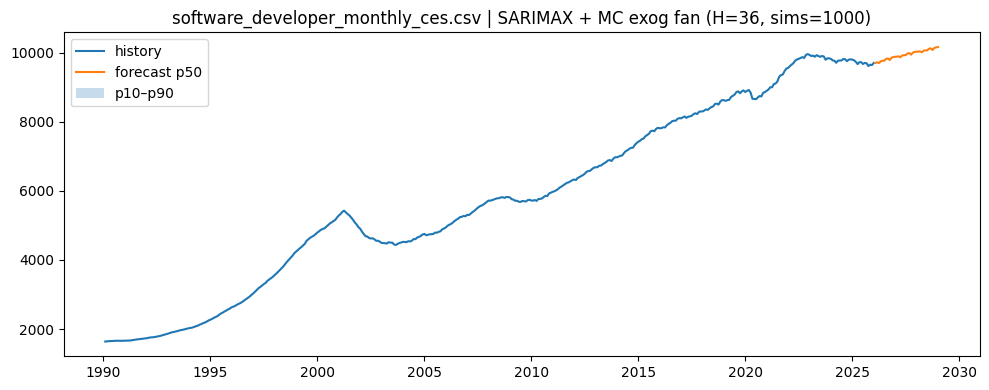

In [32]:
# ============================================================
# BLOCK 1 — SWE: rolling-median outlier fix + SARIMAX + MONTE CARLO fan
# Monte Carlo here = simulate future EXOG paths (RW+drift), then forecast for each path.
# (Same approach you used earlier, now with the outlier fixed.)
#
# Assumes:
#   cleaned_dfs_with_ai dict exists (DatetimeIndex monthly), and columns:
#     - employment_thousands
#     - gdelt_ai_share_smoothed
#
# Output:
#   swe_fit      -> fitted best model results + metadata
#   swe_mc       -> quantile dataframe + raw simulation paths for y and x
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# ---- settings ----
KEY_SWE = "software_developer_monthly_ces.csv"
Y_COL = "employment_thousands"
EXOG_COL = "gdelt_ai_share_smoothed"

SEASONAL_PERIOD = 12
d = 1
D = 1

H = 36
MC_SIMS = 1000
EXOG_FIT_WINDOW = 60
ROLL_MED_WINDOW = 13

CANDIDATE_ORDERS = [
    ((1, d, 0), (0, D, 1, SEASONAL_PERIOD)),
    ((0, d, 1), (0, D, 1, SEASONAL_PERIOD)),
    ((1, d, 1), (0, D, 1, SEASONAL_PERIOD)),
    ((1, d, 0), (1, D, 0, SEASONAL_PERIOD)),
    ((0, d, 1), (1, D, 0, SEASONAL_PERIOD)),
]

def to_month_end_index(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()
    out.index = pd.to_datetime(out.index, errors="coerce").to_period("M").to_timestamp("M")
    out = out[~out.index.isna()].sort_index()
    if not out.index.is_unique:
        out = out.groupby(out.index).mean(numeric_only=True).sort_index()
    return out

def fix_last_outlier_with_rolling_median(df: pd.DataFrame, y_col: str, window: int = 13) -> pd.DataFrame:
    out = df.copy()
    y = out[y_col].astype(float)
    roll_med = y.rolling(window, min_periods=max(6, window//2)).median()
    repl = float(roll_med.iloc[-2]) if np.isfinite(roll_med.iloc[-2]) else float(y.iloc[-2])
    out.loc[out.index[-1], y_col] = repl
    return out

def prep_endog_exog(df: pd.DataFrame, y_col: str, exog_col: str):
    df = to_month_end_index(df)
    y = df[y_col].astype(float)
    x = df[[exog_col]].astype(float).copy()
    x[exog_col] = x[exog_col].fillna(0.0)
    mask = y.notna()
    return y.loc[mask], x.loc[mask]

def fit_best_sarimax(y: pd.Series, x: pd.DataFrame, candidates):
    best = None
    best_aic = np.inf
    last_err = None
    for order, seas in candidates:
        try:
            model = SARIMAX(
                y, exog=x, order=order, seasonal_order=seas,
                trend="c", enforce_stationarity=False, enforce_invertibility=False
            )
            res = model.fit(disp=False)
            if np.isfinite(res.aic) and res.aic < best_aic:
                best_aic = res.aic
                best = (order, seas, res)
        except Exception as e:
            last_err = e
    if best is None:
        raise RuntimeError(f"All candidates failed. Last error: {last_err}")
    order, seas, res = best
    return {"order": order, "seasonal_order": seas, "result": res, "aic": float(best_aic)}

def fit_rw_drift_params(exog: pd.Series, window: int = 60) -> tuple[float, float]:
    s = exog.astype(float).fillna(0.0)
    if len(s) >= window:
        s = s.iloc[-window:]
    dx = s.diff().dropna()
    if len(dx) < 5:
        return 0.0, 0.0
    mu = float(dx.mean())
    sigma = float(dx.std(ddof=1))
    if not np.isfinite(sigma):
        sigma = 0.0
    return mu, sigma

def simulate_exog_paths(last_x: float, mu: float, sigma: float, steps: int, sims: int, clip_min: float = 0.0) -> np.ndarray:
    eps = np.random.normal(0.0, sigma, size=(sims, steps))
    dx = mu + eps
    x = np.cumsum(dx, axis=1) + last_x
    if clip_min is not None:
        x = np.maximum(x, clip_min)
    return x

def future_month_index_month_end(last_month: pd.Timestamp, steps: int) -> pd.DatetimeIndex:
    start = (pd.Timestamp(last_month).to_period("M") + 1).to_timestamp("M")
    return pd.date_range(start, periods=steps, freq="ME")

def monte_carlo_forecast_exog_only(res, x_hist: pd.DataFrame, steps: int, sims: int, exog_col: str, fit_window: int = 60):
    ex = x_hist[exog_col].astype(float).fillna(0.0)
    mu, sigma = fit_rw_drift_params(ex, window=fit_window)
    last_x = float(ex.iloc[-1])

    X_paths = simulate_exog_paths(last_x, mu, sigma, steps=steps, sims=sims, clip_min=0.0)

    Y_paths = np.empty((sims, steps), dtype=float)
    for i in range(sims):
        x_future = pd.DataFrame({exog_col: X_paths[i, :]})
        fc = res.get_forecast(steps=steps, exog=x_future)
        Y_paths[i, :] = fc.predicted_mean.to_numpy()

    idx_future = future_month_index_month_end(x_hist.index[-1], steps)
    q = {
        "p05": np.quantile(Y_paths, 0.05, axis=0),
        "p10": np.quantile(Y_paths, 0.10, axis=0),
        "p50": np.quantile(Y_paths, 0.50, axis=0),
        "p90": np.quantile(Y_paths, 0.90, axis=0),
        "p95": np.quantile(Y_paths, 0.95, axis=0),
    }
    df_q = pd.DataFrame(q, index=idx_future)
    return df_q, Y_paths, X_paths, (mu, sigma)

def plot_fan(y: pd.Series, df_q: pd.DataFrame, title: str):
    plt.figure(figsize=(10, 4))
    plt.plot(y.index, y.values, label="history")
    plt.plot(df_q.index, df_q["p50"].values, label="forecast p50")
    plt.fill_between(df_q.index, df_q["p10"].values, df_q["p90"].values, alpha=0.25, label="p10–p90")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

# ---- run SWE outlier fix + refit + MC ----
df_swe = to_month_end_index(cleaned_dfs_with_ai[KEY_SWE].copy())

print("[INFO] SWE last 5 before outlier fix:")
display(df_swe[[Y_COL]].tail(5))

df_swe_fixed = fix_last_outlier_with_rolling_median(df_swe, y_col=Y_COL, window=ROLL_MED_WINDOW)

print("[INFO] SWE last 5 after outlier fix (last point replaced):")
display(df_swe_fixed[[Y_COL]].tail(5))

# overwrite in dict so downstream uses fixed version
cleaned_dfs_with_ai[KEY_SWE] = df_swe_fixed

y_swe, x_swe = prep_endog_exog(df_swe_fixed, Y_COL, EXOG_COL)

best = fit_best_sarimax(y_swe, x_swe, candidates=CANDIDATE_ORDERS)
res_swe = best["result"]
print("Best order:", best["order"], "seasonal:", best["seasonal_order"], "AIC:", round(best["aic"], 2))

df_q_swe, Y_paths_swe, X_paths_swe, (mu_swe, sigma_swe) = monte_carlo_forecast_exog_only(
    res=res_swe, x_hist=x_swe, steps=H, sims=MC_SIMS, exog_col=EXOG_COL, fit_window=EXOG_FIT_WINDOW
)

print(f"Exog RW params (last {EXOG_FIT_WINDOW} mo): mu={mu_swe:.6g}, sigma={sigma_swe:.6g}")
display(df_q_swe.head())

plot_fan(y_swe, df_q_swe, title=f"{KEY_SWE} | SARIMAX + MC exog fan (H={H}, sims={MC_SIMS})")

swe_fit = {"order": best["order"], "seasonal_order": best["seasonal_order"], "result": res_swe, "y": y_swe, "x": x_swe}
swe_mc = {"quantiles": df_q_swe, "y_paths": Y_paths_swe, "x_paths": X_paths_swe, "mu": mu_swe, "sigma": sigma_swe}


In [33]:
# ============================================================
# SARIMAX "MATHEMATICAL EQUATION" EXPORTER
# For each fitted model, prints a compact equation form:
#
#  y_t = c + β'x_t + u_t
#  Φ(B) Φ_s(B^s) (1-B)^d (1-B^s)^D u_t = Θ(B) Θ_s(B^s) ε_t,   ε_t ~ N(0, σ^2)
#
# And then expands:
#  - AR / MA polynomials (nonseasonal + seasonal)
#  - Differencing operators
#  - Lists fitted parameter estimates (c, β, ar*, ma*, seasonal*, sigma2)
#
# Works with the objects you already created:
#   model_info_all[k]["result"]  OR fit_outputs[k]["result"]
#
# If you don't have results stored, it also shows how to fit + store quickly.
# ============================================================

import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAXResults

def _poly_to_string(lags, sign, name, B_symbol="B", power_step=1):
    """
    Build string like: 1 - φ1 B - φ2 B^2  (sign='-')
                 or:   1 + θ1 B + θ2 B^2  (sign='+')
    Here we only print symbolic coefficients with lag indices, not numeric values.
    """
    if not lags:
        return "1"
    terms = ["1"]
    for i, L in enumerate(lags, start=1):
        p = f"{B_symbol}^{L}" if L != 1 else f"{B_symbol}"
        terms.append(f" {sign} {name}{L} {p}" if sign in ["-", "+"] else f" {name}{L} {p}")
    return "".join(terms)

def _format_lag_poly_from_order(p, q, seasonal_p, seasonal_q, s):
    ar_lags = list(range(1, p+1))
    ma_lags = list(range(1, q+1))
    sar_lags = [i*s for i in range(1, seasonal_p+1)]
    sma_lags = [i*s for i in range(1, seasonal_q+1)]
    Phi = _poly_to_string(ar_lags, "-", "φ")          # AR uses minus in Φ(B)
    Theta = _poly_to_string(ma_lags, "+", "θ")        # MA uses plus in Θ(B)
    Phi_s = _poly_to_string(sar_lags, "-", "Φ")       # seasonal AR
    Theta_s = _poly_to_string(sma_lags, "+", "Θ")     # seasonal MA
    return Phi, Theta, Phi_s, Theta_s

def sarimax_equation_block(res, exog_names=None, y_name="y"):
    """
    res: SARIMAXResults
    Prints symbolic equation and then numeric fitted params.
    """
    spec = res.model
    order = spec.order            # (p,d,q)
    seas = spec.seasonal_order    # (P,D,Q,s)
    p,d,q = order
    P,D,Q,s = seas

    # Exog names
    if exog_names is None:
        exog_names = list(getattr(spec, "exog_names", [])) or []
    exog_part = ""
    if exog_names:
        beta_terms = " + ".join([f"β_{name} {name}_t" for name in exog_names])
        exog_part = f" + {beta_terms}"

    Phi, Theta, Phi_s, Theta_s = _format_lag_poly_from_order(p,q,P,Q,s)

    diff_part = []
    if d and d > 0:
        diff_part.append(f"(1 - B)^{d}")
    if D and D > 0:
        diff_part.append(f"(1 - B^{s})^{D}")
    diff_str = " ".join(diff_part) if diff_part else "1"

    # Trend/intercept
    has_const = ("intercept" in res.params.index) or ("const" in res.params.index)
    c_str = "c" if has_const else "0"

    # Core equation strings
    print("============================================================")
    print("Model:", spec.__class__.__name__)
    print("order =", (p,d,q), " seasonal_order =", (P,D,Q,s))
    print("============================================================\n")

    print("STRUCTURAL FORM")
    print(f"{y_name}_t = {c_str}{exog_part} + u_t\n")

    print("ARIMA ERROR PROCESS")
    print("Let B be the backshift operator (B y_t = y_{t-1}).")
    print(f"{Phi} · {Phi_s} · {diff_str} · u_t = {Theta} · {Theta_s} · ε_t")
    print("ε_t ~ N(0, σ^2)\n")

    # If you want it explicitly in terms of y_t (common in writeups):
    print("EQUIVALENT (COMMON WRITE-UP)")
    print(f"{Phi} · {Phi_s} · {diff_str} · ({y_name}_t - {c_str}{exog_part}) = {Theta} · {Theta_s} · ε_t\n")

    # Numeric fitted parameters (what your model actually learned)
    print("FITTED PARAMETER ESTIMATES (numeric)")
    params = res.params.copy()
    # Print in a stable order if present
    preferred_prefix = ["intercept", "const"]
    ordered = []
    for pfx in preferred_prefix:
        for k in params.index:
            if k == pfx:
                ordered.append(k)
    # exog coefs
    for name in exog_names:
        for k in params.index:
            if k == name or k.endswith(f".{name}") or k == f"beta.{name}":
                ordered.append(k)
    # remaining
    for k in params.index:
        if k not in ordered:
            ordered.append(k)

    for k in ordered:
        print(f"  {k:20s} = {params[k]: .6g}")

    print("\nNotes:")
    print("- φ, θ, Φ, Θ in the symbolic polynomials above correspond to the AR/MA parameters printed here")
    print("  (statsmodels names them like ar.L1, ma.L1, ar.S.L24, ma.S.L24, etc.).")
    print("============================================================\n")


# ------------------------------------------------------------
# USAGE
# ------------------------------------------------------------

# Option A: If you kept your fitted results in model_info_all (from the earlier block)
# and stored SARIMAXResults under model_info_all[k]["result"], run this:

if "model_info_all" in globals():
    for k, info in model_info_all.items():
        # If you stored just metadata earlier, you may not have "result" here.
        res = info.get("result", None) if isinstance(info, dict) else None
        if res is None:
            print(f"[SKIP] {k}: no SARIMAXResults stored in model_info_all[k]['result']")
            continue
        sarimax_equation_block(res, y_name="employment")
else:
    print("[INFO] model_info_all not found. If you have fit_outputs or swe_fit, use those instead.\n")

# Option B: If you have swe_fit from the SWE block:
if "swe_fit" in globals():
    sarimax_equation_block(swe_fit["result"], y_name="employment")

# Option C: If you have fit_outputs dict (from earlier):
if "fit_outputs" in globals():
    for k, payload in fit_outputs.items():
        sarimax_equation_block(payload["result"], y_name="employment")


[INFO] model_info_all not found. If you have fit_outputs or swe_fit, use those instead.

Model: SARIMAX
order = (1, 1, 1)  seasonal_order = (0, 1, 1, 12)

STRUCTURAL FORM
employment_t = c + β_gdelt_ai_share_smoothed gdelt_ai_share_smoothed_t + u_t

ARIMA ERROR PROCESS
Let B be the backshift operator (B y_t = y_{t-1}).
1 - φ1 B · 1 · (1 - B)^1 (1 - B^12)^1 · u_t = 1 + θ1 B · 1 + Θ12 B^12 · ε_t
ε_t ~ N(0, σ^2)

EQUIVALENT (COMMON WRITE-UP)
1 - φ1 B · 1 · (1 - B)^1 (1 - B^12)^1 · (employment_t - c + β_gdelt_ai_share_smoothed gdelt_ai_share_smoothed_t) = 1 + θ1 B · 1 + Θ12 B^12 · ε_t

FITTED PARAMETER ESTIMATES (numeric)
  intercept            = -0.0193691
  gdelt_ai_share_smoothed = -32.4767
  ar.L1                =  0.915407
  ma.L1                = -0.556616
  ma.S.L12             = -0.782121
  sigma2               =  588.083

Notes:
- φ, θ, Φ, Θ in the symbolic polynomials above correspond to the AR/MA parameters printed here
  (statsmodels names them like ar.L1, ma.L1, ar.S.L24, ma.S.

In [44]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

KEYS = [
    "mechanic_monthly_ces.csv",
    "graphic_designer_monthly_ces.csv",
    "software_developer_monthly_ces.csv",
]

Y_COL = "employment_thousands"
EXOG_COL = "gdelt_ai_share_smoothed"

SEASONAL_PERIOD = 12
d = 1
D = 1

CANDIDATE_ORDERS = [
    ((1, d, 0), (0, D, 1, SEASONAL_PERIOD)),
    ((0, d, 1), (0, D, 1, SEASONAL_PERIOD)),
    ((1, d, 1), (0, D, 1, SEASONAL_PERIOD)),
    ((1, d, 0), (1, D, 0, SEASONAL_PERIOD)),
    ((0, d, 1), (1, D, 0, SEASONAL_PERIOD)),
]

def prep_endog_exog(df, y_col, exog_col):
    df = df.copy()
    df.index = pd.to_datetime(df.index).to_period("M").to_timestamp("M")
    y = df[y_col].astype(float)
    x = df[[exog_col]].astype(float).fillna(0.0)
    return y, x

def fit_best_sarimax(y, x):
    best_res, best_aic, best_spec = None, np.inf, None
    for order, seas in CANDIDATE_ORDERS:
        try:
            res = SARIMAX(
                y, exog=x,
                order=order,
                seasonal_order=seas,
                trend="c",
                enforce_stationarity=False,
                enforce_invertibility=False,
            ).fit(disp=False)
            if res.aic < best_aic:
                best_res, best_aic, best_spec = res, res.aic, (order, seas)
        except Exception:
            pass
    return best_res, best_spec, best_aic

# ---- build model_info_all ----
model_info_all = {}

for k in KEYS:
    print(f"[FIT] {k}")
    y, x = prep_endog_exog(cleaned_dfs_with_ai[k], Y_COL, EXOG_COL)
    res, spec, aic = fit_best_sarimax(y, x)

    model_info_all[k] = {
        "result": res,
        "order": spec[0],
        "seasonal_order": spec[1],
        "aic": aic,
    }

    print("  order:", spec[0], "seasonal:", spec[1], "AIC:", round(aic, 2))

print("\n[OK] model_info_all rebuilt.")



[FIT] mechanic_monthly_ces.csv
  order: (0, 1, 1) seasonal: (0, 1, 1, 12) AIC: 4500.15
[FIT] graphic_designer_monthly_ces.csv
  order: (0, 1, 1) seasonal: (0, 1, 1, 12) AIC: 1542.46
[FIT] software_developer_monthly_ces.csv
  order: (1, 1, 1) seasonal: (0, 1, 1, 12) AIC: 3749.41

[OK] model_info_all rebuilt.


In [45]:
# Print SARIMAX equations with model / dataframe name labels

for k, info in model_info_all.items():
    print("\n" + "="*70)
    print(f"MODEL FOR DATAFRAME: {k}")
    print("="*70)

    res = info["result"]
    sarimax_equation_block(
        res,
        y_name="employment"
    )




MODEL FOR DATAFRAME: mechanic_monthly_ces.csv
Model: SARIMAX
order = (0, 1, 1)  seasonal_order = (0, 1, 1, 12)

STRUCTURAL FORM
employment_t = c + β_gdelt_ai_share_smoothed gdelt_ai_share_smoothed_t + u_t

ARIMA ERROR PROCESS
Let B be the backshift operator (B y_t = y_{t-1}).
1 · 1 · (1 - B)^1 (1 - B^12)^1 · u_t = 1 + θ1 B · 1 + Θ12 B^12 · ε_t
ε_t ~ N(0, σ^2)

EQUIVALENT (COMMON WRITE-UP)
1 · 1 · (1 - B)^1 (1 - B^12)^1 · (employment_t - c + β_gdelt_ai_share_smoothed gdelt_ai_share_smoothed_t) = 1 + θ1 B · 1 + Θ12 B^12 · ε_t

FITTED PARAMETER ESTIMATES (numeric)
  intercept            = -0.216309
  gdelt_ai_share_smoothed =  28728.8
  ma.L1                = -0.144689
  ma.S.L12             = -1.03179
  sigma2               =  3479.67

Notes:
- φ, θ, Φ, Θ in the symbolic polynomials above correspond to the AR/MA parameters printed here
  (statsmodels names them like ar.L1, ma.L1, ar.S.L24, ma.S.L24, etc.).


MODEL FOR DATAFRAME: graphic_designer_monthly_ces.csv
Model: SARIMAX
order = (0

In [39]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# ----------------------------
# Settings (match your pipeline)
# ----------------------------
KEYS = [
    "mechanic_monthly_ces.csv",
    "graphic_designer_monthly_ces.csv",
    "software_developer_monthly_ces.csv",
]

Y_COL = "employment_thousands"
EXOG_COL = "gdelt_ai_share_smoothed"

SEASONAL_PERIOD = 12
d = 1
D = 1

H = 36
MC_SIMS = 1000
EXOG_FIT_WINDOW = 60

CANDIDATE_ORDERS = [
    ((1, d, 0), (0, D, 1, SEASONAL_PERIOD)),
    ((0, d, 1), (0, D, 1, SEASONAL_PERIOD)),
    ((1, d, 1), (0, D, 1, SEASONAL_PERIOD)),
    ((1, d, 0), (1, D, 0, SEASONAL_PERIOD)),
    ((0, d, 1), (1, D, 0, SEASONAL_PERIOD)),
]

# ----------------------------
# Helpers (month-end index consistent with your data)
# ----------------------------
def to_month_end_index(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()
    out.index = pd.to_datetime(out.index, errors="coerce").to_period("M").to_timestamp("M")
    out = out[~out.index.isna()].sort_index()
    if not out.index.is_unique:
        out = out.groupby(out.index).mean(numeric_only=True).sort_index()
    return out

def prep_endog_exog(df: pd.DataFrame, y_col: str, exog_col: str):
    df = to_month_end_index(df)
    y = df[y_col].astype(float)
    x = df[[exog_col]].astype(float).copy()
    x[exog_col] = x[exog_col].fillna(0.0)
    mask = y.notna()
    return y.loc[mask], x.loc[mask]

def fit_best_sarimax(y: pd.Series, x: pd.DataFrame):
    best = None
    best_aic = np.inf
    last_err = None
    for order, seas in CANDIDATE_ORDERS:
        try:
            res = SARIMAX(
                y, exog=x,
                order=order,
                seasonal_order=seas,
                trend="c",
                enforce_stationarity=False,
                enforce_invertibility=False,
            ).fit(disp=False)
            if np.isfinite(res.aic) and res.aic < best_aic:
                best_aic = res.aic
                best = (order, seas, res)
        except Exception as e:
            last_err = e
    if best is None:
        raise RuntimeError(f"All SARIMAX candidates failed. Last error: {last_err}")
    order, seas, res = best
    return {"order": order, "seasonal_order": seas, "result": res, "aic": float(best_aic)}

def fit_rw_drift_params(exog: pd.Series, window: int = 60) -> tuple[float, float]:
    s = exog.astype(float).fillna(0.0)
    if len(s) >= window:
        s = s.iloc[-window:]
    dx = s.diff().dropna()
    if len(dx) < 5:
        return 0.0, 0.0
    mu = float(dx.mean())
    sigma = float(dx.std(ddof=1))
    if not np.isfinite(sigma):
        sigma = 0.0
    return mu, sigma

def simulate_exog_paths(last_x: float, mu: float, sigma: float, steps: int, sims: int, clip_min: float = 0.0) -> np.ndarray:
    eps = np.random.normal(0.0, sigma, size=(sims, steps))
    dx = mu + eps
    x = np.cumsum(dx, axis=1) + last_x
    if clip_min is not None:
        x = np.maximum(x, clip_min)
    return x

def future_month_index_month_end(last_month: pd.Timestamp, steps: int) -> pd.DatetimeIndex:
    start = (pd.Timestamp(last_month).to_period("M") + 1).to_timestamp("M")
    return pd.date_range(start, periods=steps, freq="ME")

def monte_carlo_forecast_exog_only(res, x_hist: pd.DataFrame, steps: int, sims: int, exog_col: str, fit_window: int = 60):
    ex = x_hist[exog_col].astype(float).fillna(0.0)
    mu, sigma = fit_rw_drift_params(ex, window=fit_window)
    last_x = float(ex.iloc[-1])

    X_paths = simulate_exog_paths(last_x, mu, sigma, steps=steps, sims=sims, clip_min=0.0)

    Y_paths = np.empty((sims, steps), dtype=float)
    for i in range(sims):
        x_future = pd.DataFrame({exog_col: X_paths[i, :]})
        fc = res.get_forecast(steps=steps, exog=x_future)
        Y_paths[i, :] = fc.predicted_mean.to_numpy()

    idx_future = future_month_index_month_end(x_hist.index[-1], steps)

    # uncertainty summary
    df_q = pd.DataFrame({
        "p05": np.quantile(Y_paths, 0.05, axis=0),
        "p10": np.quantile(Y_paths, 0.10, axis=0),
        "p50": np.quantile(Y_paths, 0.50, axis=0),
        "p90": np.quantile(Y_paths, 0.90, axis=0),
        "p95": np.quantile(Y_paths, 0.95, axis=0),
        "mean": np.mean(Y_paths, axis=0),
        "std": np.std(Y_paths, axis=0, ddof=1),
        "min_path": np.min(Y_paths, axis=0),
        "max_path": np.max(Y_paths, axis=0),
    }, index=idx_future)

    return df_q, Y_paths, X_paths, (mu, sigma)

# ----------------------------
# Build export tables
# ----------------------------
export_long_rows = []
export_wide = {}  # key -> df of quantiles

for k in KEYS:
    y, x = prep_endog_exog(cleaned_dfs_with_ai[k], Y_COL, EXOG_COL)
    best = fit_best_sarimax(y, x)
    res = best["result"]

    df_q, Y_paths, X_paths, (mu, sigma) = monte_carlo_forecast_exog_only(
        res=res, x_hist=x, steps=H, sims=MC_SIMS, exog_col=EXOG_COL, fit_window=EXOG_FIT_WINDOW
    )

    # store wide
    export_wide[k] = df_q.copy()

    # store long
    tmp = df_q.reset_index().rename(columns={"index": "month"})
    tmp.insert(0, "profession_key", k)
    tmp["order"] = [str(best["order"])] * len(tmp)
    tmp["seasonal_order"] = [str(best["seasonal_order"])] * len(tmp)
    tmp["aic"] = best["aic"]
    tmp["exog_mu"] = mu
    tmp["exog_sigma"] = sigma

    export_long_rows.append(tmp)

export_long_df = pd.concat(export_long_rows, ignore_index=True)

print("[OK] export_long_df ready. Columns:")
print(export_long_df.columns.tolist())
display(export_long_df.head(10))


[OK] export_long_df ready. Columns:
['profession_key', 'month', 'p05', 'p10', 'p50', 'p90', 'p95', 'mean', 'std', 'min_path', 'max_path', 'order', 'seasonal_order', 'aic', 'exog_mu', 'exog_sigma']


,profession_key,month,p05,p10,p50,p90,p95,mean,std,min_path,max_path,order,seasonal_order,aic,exog_mu,exog_sigma
0,mechanic_monthly_ces.csv,2025-12-31,6239.363866,6246.792644,6271.105953,6296.781718,6304.792601,6271.504516,19.914807,6201.722247,6333.781232,"(0, 1, 1)","(0, 1, 1, 12)",4500.154755,0.000295,0.000667
1,mechanic_monthly_ces.csv,2026-01-31,6221.002703,6229.660990,6264.463181,6301.638165,6311.635421,6265.505327,27.731628,6177.781207,6357.737151,"(0, 1, 1)","(0, 1, 1, 12)",4500.154755,0.000295,0.000667
2,mechanic_monthly_ces.csv,2026-02-28,6232.294714,6240.483857,6284.434686,6327.249714,6337.519093,6284.566090,33.525611,6190.664471,6398.765500,"(0, 1, 1)","(0, 1, 1, 12)",4500.154755,0.000295,0.000667
3,mechanic_monthly_ces.csv,2026-03-31,6244.580872,6257.652803,6304.185092,6356.850482,6368.836653,6305.109252,37.946479,6191.653343,6417.061410,"(0, 1, 1)","(0, 1, 1, 12)",4500.154755,0.000295,0.000667
4,mechanic_monthly_ces.csv,2026-04-30,6218.048000,6233.011213,6285.653841,6343.943490,6360.000848,6286.800402,43.040506,6150.019057,6421.873711,"(0, 1, 1)","(0, 1, 1, 12)",4500.154755,0.000295,0.000667
5,mechanic_monthly_ces.csv,2026-05-31,6241.993908,6258.221642,6316.628013,6378.033122,6395.498315,6317.319922,46.823764,6171.671363,6477.669865,"(0, 1, 1)","(0, 1, 1, 12)",4500.154755,0.000295,0.000667
6,mechanic_monthly_ces.csv,2026-06-30,6262.257374,6280.612036,6341.462008,6405.507481,6430.472444,6342.836628,49.946240,6191.707664,6480.915784,"(0, 1, 1)","(0, 1, 1, 12)",4500.154755,0.000295,0.000667
7,mechanic_monthly_ces.csv,2026-07-31,6261.062981,6278.095843,6346.290434,6418.909847,6443.322203,6347.894276,54.141201,6193.234287,6510.288543,"(0, 1, 1)","(0, 1, 1, 12)",4500.154755,0.000295,0.000667
8,mechanic_monthly_ces.csv,2026-08-31,6266.207903,6287.302484,6359.284418,6434.923102,6458.840138,6359.690907,57.787842,6195.915137,6540.302350,"(0, 1, 1)","(0, 1, 1, 12)",4500.154755,0.000295,0.000667
9,mechanic_monthly_ces.csv,2026-09-30,6263.464027,6279.805885,6358.284119,6440.299991,6468.641533,6360.310319,61.674903,6178.789489,6549.300614,"(0, 1, 1)","(0, 1, 1, 12)",4500.154755,0.000295,0.000667


In [40]:
from pathlib import Path

OUT_DIR = Path(r"C:\Users\whoop\PycharmProjects\PythonProject2\bls_ces\data_external\exports")
OUT_DIR.mkdir(parents=True, exist_ok=True)

# 1) Long format (best for analysis, plotting, Excel pivot tables)
long_path = OUT_DIR / "forecast_uncertainty_long.csv"
export_long_df.to_csv(long_path, index=False)
print("[WROTE]", long_path)

# 2) Wide format (one CSV per profession)
for k, dfq in export_wide.items():
    safe_name = k.replace(".csv", "").replace("/", "_")
    p = OUT_DIR / f"forecast_uncertainty_{safe_name}.csv"
    dfq.to_csv(p, index=True)
    print("[WROTE]", p)

# 3) Optional: one Excel workbook with a sheet per profession + a long sheet
try:
    xlsx_path = OUT_DIR / "forecast_uncertainty_all.xlsx"
    with pd.ExcelWriter(xlsx_path, engine="openpyxl") as writer:
        export_long_df.to_excel(writer, sheet_name="long_format", index=False)
        for k, dfq in export_wide.items():
            sheet = k.replace(".csv", "")[:31]  # Excel sheet name limit
            dfq.to_excel(writer, sheet_name=sheet, index=True)
    print("[WROTE]", xlsx_path)
except Exception as e:
    print("[SKIP] Excel export failed (openpyxl missing or path issue):", e)


[WROTE] C:\Users\whoop\PycharmProjects\PythonProject2\bls_ces\data_external\exports\forecast_uncertainty_long.csv
[WROTE] C:\Users\whoop\PycharmProjects\PythonProject2\bls_ces\data_external\exports\forecast_uncertainty_mechanic_monthly_ces.csv
[WROTE] C:\Users\whoop\PycharmProjects\PythonProject2\bls_ces\data_external\exports\forecast_uncertainty_graphic_designer_monthly_ces.csv
[WROTE] C:\Users\whoop\PycharmProjects\PythonProject2\bls_ces\data_external\exports\forecast_uncertainty_software_developer_monthly_ces.csv
[SKIP] Excel export failed (openpyxl missing or path issue): No module named 'openpyxl'
